# Imputacion de Datos Faltantes para la Precipitacion del Meta mediante modelacion KNN

Este Jupyter Notebook se enfoca en el desarrolo metodologico del trabajo de grado de los estudiantes Ronaldo Hernandez Mejia y Hector Freddy Velasco, en el cual se enfoca en la imputaciopn de datos faltnates para la variable de precipitacion en el departamento del Meta, Colombia. Con una gran volumen de datos de la informacion diaria de la precipitacion desde 1980 hasta el 2016, seleccionando un total de 56 Estaciones meteorologias del IDEAM.

La región del Meta es muy importante en este país por la diversidad del clima y su efecto sobre la agricultura y otros sectores económicos. La variabilidad de las precipitaciones juega un papel importante en el análisis del clima y la toma de decisiones relacionadas con  la gestión del agua y el clima. 

El objetivo principal es desarrolar un modelo basado en el algotimo K-Nearest Neighbors(KNN) para imputar los datos faltantes de precipitacion, utilizando un conjunto de datos que contiene mas de 700.000 observaciones. 

Dada la gran cantidad de datos se ha implementado una version que utiliza los cores del procesador para ejecutar el modelo en paralelo optimizando asi el tiempo de ejecucion, mejorando la eficiencia computacional y acelerar el proceso, tambien por este motivo el desarrolo en python tiene tiempos de respuesta cortos en el manejo de datos.



### instalacion de librerias

#### **Pandas:**

pandas es una biblioteca esencial de Python para la manipulación y el análisis de datos. Ofrece estructuras de datos como DataFrames y Series que simplifican la gestión de datos tabulares y temporales, respectivamente.

#### **IPython:**

Es un shell interactivo que añade funcionalidades extra al modo estándar de Python, como resaltado de líneas y errores mediante colores, una sintaxis adicional y un sistema de "mágias".


#### **Pandasgui:**

Es una interfaz gráfica de usuario (GUI) para visualizar DataFrames de pandas. Permite un análisis exploratorio de datos de manera intuitiva y visual.

#### **NumPy:**

Es la biblioteca fundamental para la computación científica en Python. Proporciona estructuras de datos de alto rendimiento, como arrays, y herramientas para trabajar con ellos.

#### **Matplotlib:**

Es una biblioteca de visualización en Python, que proporciona una plataforma robusta para representar gráficos y figuras en diversos formatos y ambientes.

#### **Joblib:**

Es una herramienta para proporcionar serialización ligera en Python. Es especialmente útil para objetos que incluyen grandes arrays de datos, como modelos de machine learning entrenados con scikit-learn

#### **scikit-learn**
scikit-learn es una de las bibliotecas más utilizadas en Python para aprendizaje automático. Ofrece herramientas simples y eficientes para análisis de datos y modelado estadístico.


## 2.1 Importing the libraries and dataset:

In [1]:
import subprocess
import sys
import importlib

def install_and_import(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    finally:
        globals()[package] = importlib.import_module(package)


In [36]:
packages = ['pandas', 'IPython', 'pandasgui', 'numpy', 'matplotlib','joblib','sklearn','missingno','wheel']

for package in packages:
    install_and_import(package)


ImportError: libGL.so.1: cannot open shared object file: No such file or directory

En caso de que no funcione instalacion manual:

In [38]:
pip install -U pip 

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install pandasgui

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install wheel


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
#observar donde estoy en ruta 
os.getcwd()

'f:\\TESIS\\Proyecto_mod_precipitacion\\Codigos de Python'

Ruta Ronaldo 

In [4]:
import os
current_path = os.getcwd()
print(f"Ruta actual del directorio de trabajo: {current_path}")
new_path = "/workspaces/Proyecto_mod_precipitacion"
os.chdir(new_path)
new_current_path = os.getcwd()
print(f"Nueva ruta del directorio de trabajo: {new_current_path}")

Ruta actual del directorio de trabajo: F:\TESIS\Proyecto_mod_precipitacion


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/workspaces/Proyecto_mod_precipitacion'

In [5]:
import os
current_path = os.getcwd()
print(f"Ruta actual del directorio de trabajo: {current_path}")
new_path = "F:\\TESIS\\Proyecto_mod_precipitacion"
os.chdir(new_path)
new_current_path = os.getcwd()
print(f"Nueva ruta del directorio de trabajo: {new_current_path}")

Ruta actual del directorio de trabajo: F:\TESIS\Proyecto_mod_precipitacion
Nueva ruta del directorio de trabajo: F:\TESIS\Proyecto_mod_precipitacion


Ruta hector 

In [ ]:
import os
current_path = os.getcwd()
print(f"Ruta actual del directorio de trabajo: {current_path}")
new_path = "c:\\Users\\vhect\\Documents\\semestre 10\\TESIS\\Proyecto_mod_precipitacion"
os.chdir(new_path)
new_current_path = os.getcwd()
print(f"Nueva ruta del directorio de trabajo: {new_current_path}")

Ruta actual del directorio de trabajo: c:\Users\vhect\Documents\semestre 10\TESIS\Proyecto_mod_precipitacion\Codigos de Python
Nueva ruta del directorio de trabajo: c:\Users\vhect\Documents\semestre 10\TESIS\Proyecto_mod_precipitacion


### Ejemplo sencillo del funcionamiento del modelo KNN

modelo KNN 
scikit-learn es una biblioteca de aprendizaje automático de código 
abierto que ofrece implementaciones eficientes de una amplia variedad
de algoritmos de aprendizaje, incluyendo KNN. Además, proporciona funciones
para la imputación de datos faltantes utilizando KNN y otras técnicas.

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer


In [7]:

def impute_precipitation_for_station(station_data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data[['precipitation']])
    station_data['precipitation_imputed'] = station_data_imputed
    return station_data

# Crear datos de ejemplo
data = pd.DataFrame({
    'station_id': [1, 1, 2, 2, 3, 3],
    'precipitation': [1, np.nan, 3, 4, np.nan, 6]
})

stations = data['station_id'].unique()
imputed_data = pd.DataFrame()

for station in stations:
    station_data = data[data['station_id'] == station]
    station_data_imputed = impute_precipitation_for_station(station_data)
    imputed_data = imputed_data.append(station_data_imputed)


C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\60805419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['precipitation_imputed'] = station_data_imputed
C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\60805419.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imputed_data = imputed_data.append(station_data_imputed)
C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\60805419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

Presenta el Dataframe con las variables imputadas atravez de la metodologia KNN

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Tu código
print(imputed_data)

   station_id  precipitation  precipitation_imputed
0           1            1.0                    1.0
1           1            NaN                    1.0
2           2            3.0                    3.0
3           2            4.0                    4.0
4           3            NaN                    6.0
5           3            6.0                    6.0


Para este sencillo paso se observa como el algoritmo es capaz de reconocer por imputacion mediante la informacion de la variable station_id.sin embargo para el caso real de la aplicacion de KNN, se debe tener en cuenta que es sencible a las escalas cuandos se utilizan mas variables.

In [13]:
from sklearn.impute import KNNImputer

#imputacion = KNNImputer(*#, missing_values: float | str | int | None = ..., n_neighbors: Int = 5, weights: ((...) -> Any) | Literal['uniform', 'distance'] = "uniform", metric: ((...) -> Any) | Literal['nan_euclidean'] = "nan_euclidean", copy: bool = True, add_indicator: bool = False, keep_empty_features: bool = Fals)

imputacion = KNNImputer(n_neighbors=1)


In [15]:
imputacion.metric

'nan_euclidean'

### Lectura de datos

In [43]:
import pandas as pd

In [23]:
data = pd.read_csv("Datos/datos_seleccionados_para_modelo_coordenadas.txt",sep=";")
data.head(10)


,Date,prec,ID,LAT,LON
0,1983-06-09,6.8,32010010,2.562833,-74.103083
1,1983-06-10,17.8,32010010,2.562833,-74.103083
2,1983-06-11,0.0,32010010,2.562833,-74.103083
3,1983-06-12,0.5,32010010,2.562833,-74.103083
4,1983-06-13,6.9,32010010,2.562833,-74.103083
5,1983-06-14,7.7,32010010,2.562833,-74.103083
6,1983-06-15,16.2,32010010,2.562833,-74.103083
7,1983-06-16,20.8,32010010,2.562833,-74.103083
8,1983-06-17,0.0,32010010,2.562833,-74.103083
9,1983-06-18,0.0,32010010,2.562833,-74.103083


In [24]:

data2 = pd.read_csv("Datos/datos_combinados_para_modelo_con_coordenadas.txt",sep=";")
data2.head(10)


,Date,prec,ID,LAT,LON
0,1983-06-09,6.8,32010010,2.562833,-74.103083
1,1983-06-10,17.8,32010010,2.562833,-74.103083
2,1983-06-11,0.0,32010010,2.562833,-74.103083
3,1983-06-12,0.5,32010010,2.562833,-74.103083
4,1983-06-13,6.9,32010010,2.562833,-74.103083
5,1983-06-14,7.7,32010010,2.562833,-74.103083
6,1983-06-15,16.2,32010010,2.562833,-74.103083
7,1983-06-16,20.8,32010010,2.562833,-74.103083
8,1983-06-17,0.0,32010010,2.562833,-74.103083
9,1983-06-18,0.0,32010010,2.562833,-74.103083


In [25]:


data3 = pd.read_csv("Datos/datos_combinados_para_modelo.txt",sep=";")
data3.head(10)


,Date,prec,ID
0,1983-06-09,6.8,32010010
1,1983-06-10,17.8,32010010
2,1983-06-11,0.0,32010010
3,1983-06-12,0.5,32010010
4,1983-06-13,6.9,32010010
5,1983-06-14,7.7,32010010
6,1983-06-15,16.2,32010010
7,1983-06-16,20.8,32010010
8,1983-06-17,0.0,32010010
9,1983-06-18,0.0,32010010


In [26]:

data4 = pd.read_csv("Datos/datos_seleccionadods_para_modelo.txt",sep=";")
data4.head(10)



,Date,prec,ID
0,1983-06-09,6.8,32010010
1,1983-06-10,17.8,32010010
2,1983-06-11,0.0,32010010
3,1983-06-12,0.5,32010010
4,1983-06-13,6.9,32010010
5,1983-06-14,7.7,32010010
6,1983-06-15,16.2,32010010
7,1983-06-16,20.8,32010010
8,1983-06-17,0.0,32010010
9,1983-06-18,0.0,32010010


Estructura de los datos

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    656436 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      656436 non-null  int64  
 3   LAT     656436 non-null  float64
 4   LON     656436 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.0+ MB


Visualizacion de los datos faltantes 

<Figure size 720x432 with 0 Axes>

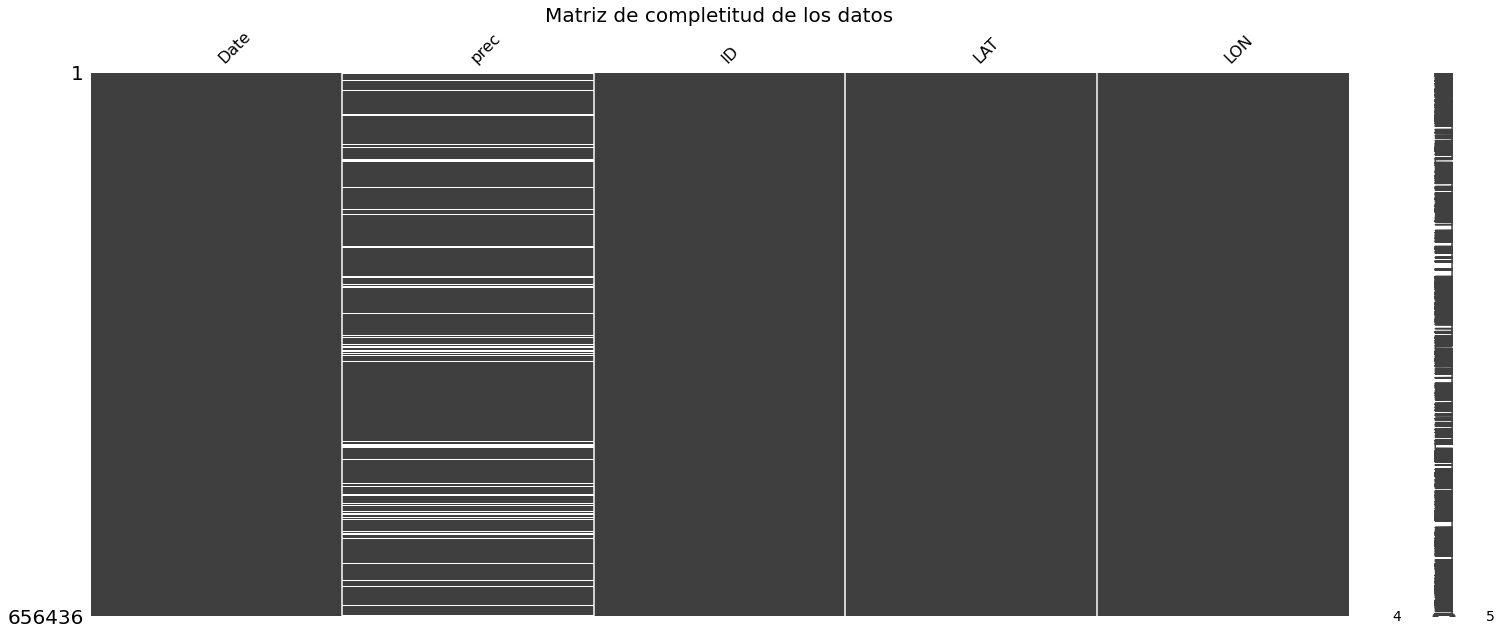

<Figure size 720x432 with 0 Axes>

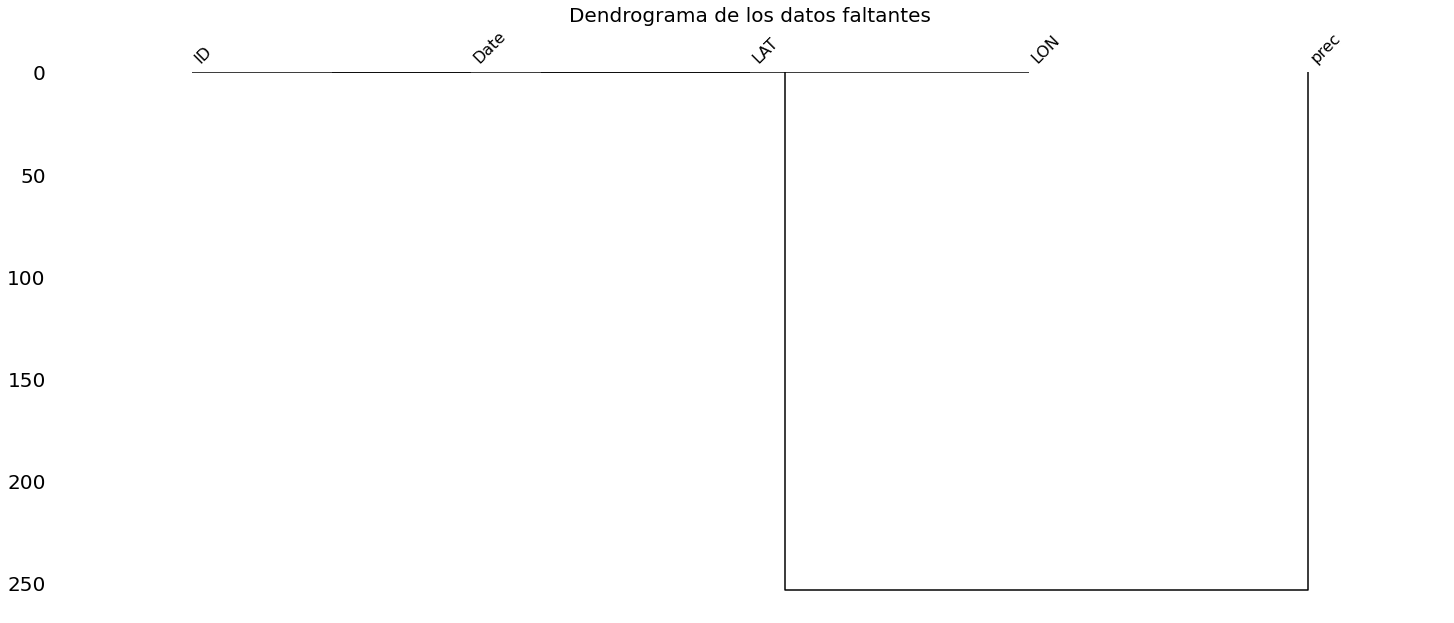

Date        0
prec    64312
ID          0
LAT         0
LON         0
dtype: int64


In [29]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Suponemos que 'data' es tu DataFrame

# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(data)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()

# Agrupar las columnas con datos faltantes similares con dendrograma
plt.figure(figsize=(10,6))
msno.dendrogram(data)
plt.title('Dendrograma de los datos faltantes', fontsize=20)
plt.show()

# Resumen de la cantidad de datos faltantes por columna
print(data.isnull().sum())


### Correccion de variables para el modelo

In [30]:
data.head(5)

,Date,prec,ID,LAT,LON
0,1983-06-09,6.8,32010010,2.562833,-74.103083
1,1983-06-10,17.8,32010010,2.562833,-74.103083
2,1983-06-11,0.0,32010010,2.562833,-74.103083
3,1983-06-12,0.5,32010010,2.562833,-74.103083
4,1983-06-13,6.9,32010010,2.562833,-74.103083


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    656436 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      656436 non-null  int64  
 3   LAT     656436 non-null  float64
 4   LON     656436 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.0+ MB


In [32]:
# Asegurarte de que 'Date' es una columna datetime
data['Date'] = pd.to_datetime(data['Date'])

# Crear nuevas columnas para el año, mes y día
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Crear un nuevo dataframe con las columnas deseadas
new_data = data[['ID', 'Year', 'Month', 'Day', 'prec', 'LAT', 'LON']].copy()


In [33]:
new_data = new_data.sort_values('ID')


In [34]:
new_data.head(10)

,ID,Year,Month,Day,prec,LAT,LON
0,32010010,1983,6,9,6.8,2.562833,-74.103083
8045,32010010,2005,6,18,8.0,2.562833,-74.103083
8046,32010010,2005,6,19,12.0,2.562833,-74.103083
8047,32010010,2005,6,20,0.0,2.562833,-74.103083
8048,32010010,2005,6,21,4.0,2.562833,-74.103083
8049,32010010,2005,6,22,0.0,2.562833,-74.103083
8050,32010010,2005,6,23,3.0,2.562833,-74.103083
8051,32010010,2005,6,24,41.0,2.562833,-74.103083
8052,32010010,2005,6,25,8.0,2.562833,-74.103083
8053,32010010,2005,6,26,3.0,2.562833,-74.103083


In [36]:
new_data = new_data.rename(columns={
    'Year': 'Año',
    'Month': 'Mes',
    'Day': 'Día',
    'prec': 'prec',
    'LAT': 'LAT',
    'LON': 'LON'
})


new_data2 = new_data.rename(columns={
    'Year': 'Año',
    'Month': 'Mes',
    'Day': 'Día',
    'prec': 'prec',
    'LAT': 'LAT',
    'LON': 'LON',
    'ID': 'ID'
})


In [37]:
new_data = new_data[['Año', 'Mes', 'Día', 'prec', 'LAT', 'LON']]


In [ ]:
new_data2 = new_data2[['Año', 'Mes', 'Día', 'prec', 'LAT', 'LON','ID']]


In [95]:
new_data2

,Año,Mes,Día,prec,LAT,LON,ID
0,1983,6,9,6.8,2.562833,-74.103083,32010010
8045,2005,6,18,8.0,2.562833,-74.103083,32010010
8046,2005,6,19,12.0,2.562833,-74.103083,32010010
8047,2005,6,20,0.0,2.562833,-74.103083,32010010
8048,2005,6,21,4.0,2.562833,-74.103083,32010010
...,...,...,...,...,...,...,...
654272,2008,8,15,NaN,4.260361,-72.564472,35185010
654273,2008,8,16,NaN,4.260361,-72.564472,35185010
654274,2008,8,17,NaN,4.260361,-72.564472,35185010
654264,2008,8,7,0.1,4.260361,-72.564472,35185010


In [54]:
new_data.head(5)

,Año,Mes,Día,prec,LAT,LON
0,1983,6,9,6.8,2.562833,-74.103083
8045,2005,6,18,8.0,2.562833,-74.103083
8046,2005,6,19,12.0,2.562833,-74.103083
8047,2005,6,20,0.0,2.562833,-74.103083
8048,2005,6,21,4.0,2.562833,-74.103083


In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656436 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     656436 non-null  int32  
 1   Mes     656436 non-null  int32  
 2   Día     656436 non-null  int32  
 3   prec    592124 non-null  float64
 4   LAT     656436 non-null  float64
 5   LON     656436 non-null  float64
dtypes: float64(3), int32(3)
memory usage: 27.5 MB


### Separacion de datos completos y faltantes

Surge de la necesidad de tener la data completa para tener el registro de los datos observados reales, los cuales son los que brindaran el soporte a las matricas estadisticas de desempeño como el RMSE,MAE,PRMSE

In [39]:
# Separar los datos completos de los datos con valores faltantes en 'Prec'
data_completa = new_data.dropna(subset=['prec'])
data_faltantes = new_data[new_data['prec'].isna()]

#Que incluya la variable ID

data_completa2 = new_data2.dropna(subset=['prec'])
data_faltantes2 = new_data2[new_data['prec'].isna()]


In [40]:
data_faltantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64312 entries, 8801 to 654274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Año     64312 non-null  int64  
 1   Mes     64312 non-null  int64  
 2   Día     64312 non-null  int64  
 3   prec    0 non-null      float64
 4   LAT     64312 non-null  float64
 5   LON     64312 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.4 MB


In [58]:
data_completa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592124 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     592124 non-null  int32  
 1   Mes     592124 non-null  int32  
 2   Día     592124 non-null  int32  
 3   prec    592124 non-null  float64
 4   LAT     592124 non-null  float64
 5   LON     592124 non-null  float64
dtypes: float64(3), int32(3)
memory usage: 24.8 MB


#### Prueba de aletoriedad 

In [ ]:
import missingno as msno
import numpy as np
import scipy.stats as stats


# Prueba de littler


Ahora para simular los datos faltantes reales del 8.27%, se imputaran el 10% de datos faltantes por medio de una funcion aletoria para un total de 59.212 datos faltantes, la funcion toma aletoriamente las posiciones de la variable seleccionada y realizara un extraccion de la informacion, dejando asi un registro faltante como resultado.

Esto con el objetivo de simular la situacion del modelo en una naturaleza de los datos completamente al azar,En el proceso de análisis de datos, especialmente en contextos donde la imputación de datos faltantes es crucial, es importante simular condiciones realistas para evaluar la robustez y eficacia de los métodos de imputación. Esto se logra a través de la inserción controlada de datos faltantes en el conjunto de datos original. La introducción de un porcentaje específico de datos faltantes, en este caso, un 10%, se basa en la necesidad de replicar escenarios comunes en la recopilación de datos donde la ausencia de información puede deberse a errores de medición, fallas de los sensores, o problemas en la transmisión de datos (Rubin, 1976; Little & Rubin, 1987)\cite{rubin1976, little1987}.

In [41]:
import numpy as np

def insertar_nan_aleatoriamente(df, nombre_columna, fraccion):
    df = df.copy()
    df['Original'] = df[nombre_columna]
    indices_a_modificar = df[nombre_columna].dropna().sample(frac=fraccion).index
    df.loc[indices_a_modificar, nombre_columna] = np.nan
    return df

# Insertar aleatoriamente NaN en el 10% de los datos
data_completa_mod = insertar_nan_aleatoriamente(data_completa, 'prec', 0.1)


data_completa_mod2 = insertar_nan_aleatoriamente(data_completa2, 'prec', 0.1)






In [42]:
data_completa_mod.info()
data_completa_mod.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int64  
 1   Mes       592124 non-null  int64  
 2   Día       592124 non-null  int64  
 3   prec      532912 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   Original  592124 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 52.3 MB


,Año,Mes,Día,prec,LAT,LON,Original
0,1983,6,9,NaN,2.562833,-74.103083,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,8.0
8046,2005,6,19,NaN,2.562833,-74.103083,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,4.0
8049,2005,6,22,0.0,2.562833,-74.103083,0.0
8050,2005,6,23,NaN,2.562833,-74.103083,3.0
8051,2005,6,24,41.0,2.562833,-74.103083,41.0
8052,2005,6,25,NaN,2.562833,-74.103083,8.0
8053,2005,6,26,3.0,2.562833,-74.103083,3.0


In [43]:
data_completa_mod2

,Año,Mes,Día,prec,LAT,LON,ID,Original
0,1983,6,9,6.8,2.562833,-74.103083,32010010,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,32010010,8.0
8046,2005,6,19,12.0,2.562833,-74.103083,32010010,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,32010010,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,32010010,4.0
...,...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,35185010,0.0
654268,2008,8,11,3.7,4.260361,-72.564472,35185010,3.7
654269,2008,8,12,0.1,4.260361,-72.564472,35185010,0.1
654264,2008,8,7,0.1,4.260361,-72.564472,35185010,0.1


Visualiuzacion datos faltantes para la data completa modificada

<Figure size 1000x600 with 0 Axes>

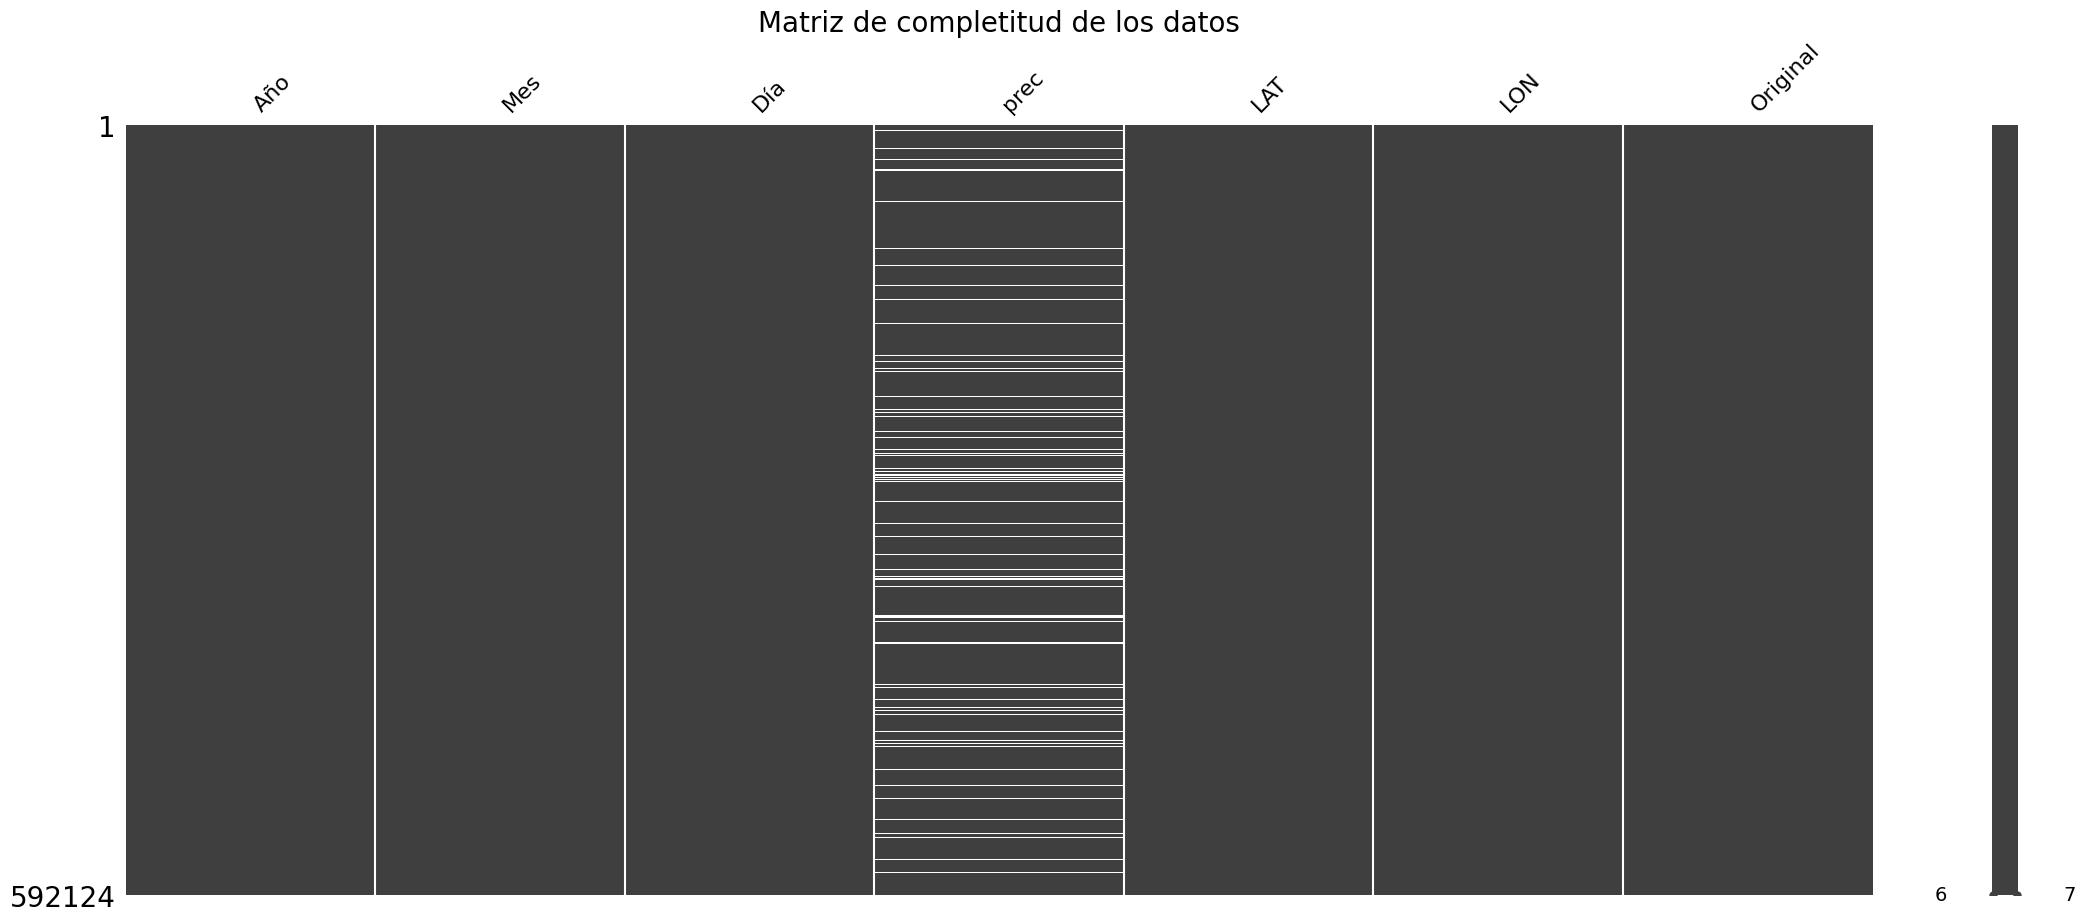

In [61]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Suponemos que 'data' es tu DataFrame

# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(data_completa_mod)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()


In [62]:
soloNAn=na_rows = data_completa_mod[data_completa_mod['prec'].isna()]
soloNAn

,Año,Mes,Día,prec,LAT,LON,Original
8051,2005,6,24,NaN,2.562833,-74.103083,41.0
8052,2005,6,25,NaN,2.562833,-74.103083,8.0
8021,2005,5,25,NaN,2.562833,-74.103083,0.0
8022,2005,5,26,NaN,2.562833,-74.103083,27.0
8027,2005,5,31,NaN,2.562833,-74.103083,2.0
...,...,...,...,...,...,...,...
654209,2008,6,13,NaN,4.260361,-72.564472,0.0
654211,2008,6,15,NaN,4.260361,-72.564472,0.6
654249,2008,7,23,NaN,4.260361,-72.564472,0.0
654282,2008,8,25,NaN,4.260361,-72.564472,17.0


## Prueba de aletoriedad 

Con el fin de comprobar la aletoriedad en la prueba de hipotesis se contrasta una vez se ejecuta la funcion del 10% de datos faltantes 

In [44]:
import missingno as msno
import numpy as np
import scipy.stats as stats


In [53]:

# Perform the Little's MCAR test
littles_test = stats.littles_test(data_completa_mod)

# Print the test results
print(littles_test)

AttributeError: module 'scipy.stats' has no attribute 'littles_test'

In [97]:
data_completa_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int64  
 1   Mes       592124 non-null  int64  
 2   Día       592124 non-null  int64  
 3   prec      532912 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   Original  592124 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 52.3 MB


### Division en datos de prueba y validacion 

La división de los datos en subconjuntos de entrenamiento y prueba es una práctica estándar en la ciencia de datos y el aprendizaje automático, permitiendo que los modelos se ajusten a un conjunto de datos (entrenamiento) y se validen o prueben en un conjunto independiente (prueba). Esta estrategia, denominada validación cruzada, es esencial para evaluar el rendimiento de los modelos de imputación y para garantizar que los resultados sean generalizables y no simplemente ajustados a los datos específicos de entrenamiento (Hastie, Tibshirani, & Friedman, 2009)\cite{hastie2009}. La proporción de división de 80% para entrenamiento y 20% para prueba es una elección común que equilibra la necesidad de tener suficientes datos para el aprendizaje del modelo y suficientes datos para su evaluación efectiva (James, Witten, Hastie, & Tibshirani, 2013)\cite{james2013}. La reproducibilidad y consistencia de los resultados se garantizan mediante el uso de un random_state fijo, lo que es fundamental para la validación de los métodos de imputación (Bishop, 2006)\cite{bishop2006}.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un conjunto de datos de LightGBM para el entrenamiento
train_data = lgb.Dataset(X_train, label=y_train)


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

# Cargar tus datos
# df = pd.read_csv('tu_archivo_de_datos.csv')

# Crear valores faltantes de manera controlada
def insert_missing_values(df, missing_percentage):
    df_missing = df.copy()
    for col in df_missing.columns:
        df_missing.loc[df_missing.sample(frac=missing_percentage).index, col] = np.nan
    return df_missing

# Aplicar la función para crear datos faltantes
missing_percentage = 0.1  # Por ejemplo, el 10% de los datos
df_missing = insert_missing_values(new_data, missing_percentage)

# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(new_data, test_size=0.2, random_state=42)

# Imputar valores usando KNN
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos
train_imputed = imputer.fit_transform(train)
test_imputed = imputer.transform(test)

# Comparar los valores imputados con los valores reales
# Asumiendo que tienes los valores reales en otro DataFrame para comparar
mse = mean_squared_error(test.dropna(), test_imputed)
print(f'Error Cuadrático Medio de la Imputación: {mse}')


ValueError: Found input variables with inconsistent numbers of samples: [118562, 131288]

In [56]:
# Encuentra los índices de las filas sin NA en el conjunto de prueba original
non_na_indices = test.dropna().index

# Utiliza solo las filas correspondientes del conjunto imputado
test_imputed_aligned = test_imputed[non_na_indices, :]

# Calcula MSE usando las filas alineadas
mse = mean_squared_error(test.loc[non_na_indices], test_imputed_aligned)
print(f'Error Cuadrático Medio de la Imputación: {mse}')


IndexError: index 430890 is out of bounds for axis 0 with size 131288

In [60]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

# Asumiendo que tu DataFrame se llama data_completa_modelo
# Si necesitas cargar tus datos desde un archivo, puedes descomentar la siguiente línea:
# data_completa_modelo = pd.read_csv('tu_archivo.csv')

# Definir la función para imputar un fragmento del DataFrame
def impute_chunk(df_chunk, imputer):
    """Función para imputar un fragmento del DataFrame."""
    cols_to_impute = ['prec']  # Cambia esto según las columnas que necesites imputar
    df_chunk[cols_to_impute] = imputer.transform(df_chunk[cols_to_impute])
    return df_chunk

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=5)  # Ajusta el número de vecinos según tus necesidades

# Ajustar el imputador solo a la columna 'prec'
imputer.fit(data_completa_modelo[['prec']])

# Dividir los datos en chunks para paralelizar
n_chunks = 10  # Ajusta este número según tus necesidades y recursos
chunks = np.array_split(data_completa_modelo, n_chunks)

# Paralelizar la imputación
imputed_chunks = Parallel(n_jobs=-1)(delayed(impute_chunk)(chunk, imputer) for chunk in chunks)

# Concatenar los resultados
imputed_data = pd.concat(imputed_chunks, ignore_index=True)

# imputed_data contiene tu DataFrame con los valores imputados en la columna 'prec'


In [91]:
imputed_data = pd.concat(imputed_chunks, ignore_index=True)


In [88]:
data_completa_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int64  
 1   Mes       592124 non-null  int64  
 2   Día       592124 non-null  int64  
 3   prec      532912 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   Original  592124 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 52.3 MB


In [71]:
data_completa_modelo.info()

original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     592124 non-null  int64  
 1   Mes     592124 non-null  int64  
 2   Día     592124 non-null  int64  
 3   prec    532912 non-null  float64
 4   LAT     592124 non-null  float64
 5   LON     592124 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 47.7 MB
<class 'pandas.core.series.Series'>
Int64Index: 592124 entries, 0 to 656435
Series name: Original
Non-Null Count   Dtype  
--------------   -----  
592124 non-null  float64
dtypes: float64(1)
memory usage: 25.2 MB


In [93]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592124 entries, 0 to 592123
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     592124 non-null  int64  
 1   Mes     592124 non-null  int64  
 2   Día     592124 non-null  int64  
 3   prec    592124 non-null  float64
 4   LAT     592124 non-null  float64
 5   LON     592124 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 27.1 MB


In [89]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592124 entries, 0 to 592123
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Año             592124 non-null  int64  
 1   Mes             592124 non-null  int64  
 2   Día             592124 non-null  int64  
 3   prec            592124 non-null  float64
 4   LAT             592124 non-null  float64
 5   LON             592124 non-null  float64
 6   Original        534254 non-null  float64
 7   DatosFaltantes  592124 non-null  bool   
dtypes: bool(1), float64(4), int64(3)
memory usage: 32.2 MB


In [83]:
import pandas as pd

# Asumiendo que ya has cargado tu DataFrame como data_completa_modelo
# Identificamos las posiciones de los datos faltantes
posiciones_datos_faltantes = data_completa_modelo['prec'].isna()


In [84]:
original

0          6.8
8045       8.0
8046      12.0
8047       0.0
8048       4.0
          ... 
654265     0.0
654268     3.7
654269     0.1
654264     0.1
656435     0.0
Name: Original, Length: 592124, dtype: float64

In [79]:
# Asumiendo que la serie 'Original' y el DataFrame 'imputed_data' ya están cargados
# Unimos la serie 'Original' con 'imputed_data'
imputed_data['Original'] = original


In [94]:
import pandas as pd

# Asumiendo que data_completa_mod e imputed_data son tus DataFrames

# Realizando el merge (fusión)
# Usamos 'left' para mantener todas las filas en imputed_data y agregar la columna 'Original' de data_completa_mod
merged_data = pd.merge(imputed_data, data_completa_mod[['Año', 'Mes', 'Día', 'LAT', 'LON', 'Original']], 
                       on=['Año', 'Mes', 'Día', 'LAT', 'LON'], 
                       how='left')

# Verificando el resultado
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 592123
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int64  
 1   Mes       592124 non-null  int64  
 2   Día       592124 non-null  int64  
 3   prec      592124 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   Original  592124 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 36.1 MB
None


In [95]:
merged_data

,Año,Mes,Día,prec,LAT,LON,Original
0,1983,6,9,8.901366,2.562833,-74.103083,6.8
1,2005,6,18,8.000000,2.562833,-74.103083,8.0
2,2005,6,19,8.901366,2.562833,-74.103083,12.0
3,2005,6,20,0.000000,2.562833,-74.103083,0.0
4,2005,6,21,4.000000,2.562833,-74.103083,4.0
...,...,...,...,...,...,...,...
592119,2008,8,8,0.000000,4.260361,-72.564472,0.0
592120,2008,8,11,8.901366,4.260361,-72.564472,3.7
592121,2008,8,12,0.100000,4.260361,-72.564472,0.1
592122,2008,8,7,0.100000,4.260361,-72.564472,0.1


In [98]:
import pandas as pd

# Asumiendo que data_completa_mod y merged_data son tus DataFrames existentes

# Cambiando el nombre de la columna
data_completa_mod.rename(columns={'prec': 'prec_ori_NA'}, inplace=True)

# Realizando el merge
# Fusionamos merged_data con la columna renombrada de data_completa_mod
final_merged_data = pd.merge(merged_data, data_completa_mod[['Año', 'Mes', 'Día', 'LAT', 'LON', 'prec_ori_NA']], 
                             on=['Año', 'Mes', 'Día', 'LAT', 'LON'], 
                             how='left')

# Verificando el resultado
print(final_merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 592123
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Año          592124 non-null  int64  
 1   Mes          592124 non-null  int64  
 2   Día          592124 non-null  int64  
 3   prec         592124 non-null  float64
 4   LAT          592124 non-null  float64
 5   LON          592124 non-null  float64
 6   Original     592124 non-null  float64
 7   prec_ori_NA  532912 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 40.7 MB
None


In [99]:
final_merged_data

,Año,Mes,Día,prec,LAT,LON,Original,prec_ori_NA
0,1983,6,9,8.901366,2.562833,-74.103083,6.8,NaN
1,2005,6,18,8.000000,2.562833,-74.103083,8.0,8.0
2,2005,6,19,8.901366,2.562833,-74.103083,12.0,NaN
3,2005,6,20,0.000000,2.562833,-74.103083,0.0,0.0
4,2005,6,21,4.000000,2.562833,-74.103083,4.0,4.0
...,...,...,...,...,...,...,...,...
592119,2008,8,8,0.000000,4.260361,-72.564472,0.0,0.0
592120,2008,8,11,8.901366,4.260361,-72.564472,3.7,NaN
592121,2008,8,12,0.100000,4.260361,-72.564472,0.1,0.1
592122,2008,8,7,0.100000,4.260361,-72.564472,0.1,0.1


In [75]:
# Mostramos las posiciones de los datos faltantes
print(posiciones_datos_faltantes[posiciones_datos_faltantes == True])


0         True
8046      True
8050      True
8052      True
8061      True
          ... 
654242    True
654245    True
654247    True
654217    True
654268    True
Name: prec, Length: 59212, dtype: bool


In [76]:
posiciones_datos_faltantes

0          True
8045      False
8046       True
8047      False
8048      False
          ...  
654265    False
654268     True
654269    False
654264    False
656435    False
Name: prec, Length: 592124, dtype: bool

In [80]:
imputed_data

,Año,Mes,Día,prec,LAT,LON,Original
0,1983,6,9,8.901366,2.562833,-74.103083,6.8
1,2005,6,18,8.000000,2.562833,-74.103083,17.8
2,2005,6,19,8.901366,2.562833,-74.103083,0.0
3,2005,6,20,0.000000,2.562833,-74.103083,0.5
4,2005,6,21,4.000000,2.562833,-74.103083,6.9
...,...,...,...,...,...,...,...
592119,2008,8,8,0.000000,4.260361,-72.564472,0.0
592120,2008,8,11,8.901366,4.260361,-72.564472,0.0
592121,2008,8,12,0.100000,4.260361,-72.564472,0.0
592122,2008,8,7,0.100000,4.260361,-72.564472,0.0


In [82]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592124 entries, 0 to 592123
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Año             592124 non-null  int64  
 1   Mes             592124 non-null  int64  
 2   Día             592124 non-null  int64  
 3   prec            592124 non-null  float64
 4   LAT             592124 non-null  float64
 5   LON             592124 non-null  float64
 6   Original        534254 non-null  float64
 7   DatosFaltantes  592124 non-null  bool   
dtypes: bool(1), float64(4), int64(3)
memory usage: 32.2 MB


In [81]:
import pandas as pd

# Asumiendo que ya has cargado tu DataFrame como data_completa_modelo
# Crear una serie de valores booleanos para datos faltantes
datos_faltantes = data_completa_modelo['prec'].isna()
# Asumiendo que imputed_data ya está cargado
# Agregamos la serie de datos faltantes a imputed_data
imputed_data['DatosFaltantes'] = datos_faltantes.values
# Filtrar para mostrar solo las filas con datos faltantes originalmente
imputed_data_con_faltantes = imputed_data[imputed_data['DatosFaltantes'] == True]
print(imputed_data_con_faltantes)


         Año  Mes  Día      prec       LAT        LON  Original  \
0       1983    6    9  8.901366  2.562833 -74.103083       6.8   
2       2005    6   19  8.901366  2.562833 -74.103083       0.0   
6       2005    6   23  8.901366  2.562833 -74.103083      16.2   
8       2005    6   25  8.901366  2.562833 -74.103083       0.0   
17      2005    7    4  8.901366  2.562833 -74.103083       0.0   
...      ...  ...  ...       ...       ...        ...       ...   
592094  2008    7   16  8.901366  4.260361 -72.564472       0.0   
592095  2008    7   19  8.901366  4.260361 -72.564472       0.0   
592097  2008    7   21  8.901366  4.260361 -72.564472       0.0   
592104  2008    6   21  8.901366  4.260361 -72.564472       0.0   
592120  2008    8   11  8.901366  4.260361 -72.564472       0.0   

        DatosFaltantes  
0                 True  
2                 True  
6                 True  
8                 True  
17                True  
...                ...  
592094            Tr

In [68]:
# Agregar la columna 'Original' a imputed_data
imputed_data['Original'] = data_completa_modelo['original']

# Filtrar las filas donde 'prec' era originalmente NaN para el cálculo de RMSE
mask = data_completa_modelo['prec'].isna()

# Calcular RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(imputed_data.loc[mask, 'original'], imputed_data.loc[mask, 'prec']))
print(f'RMSE de la Imputación: {rmse}')


KeyError: 'original'

In [64]:
from sklearn.metrics import mean_squared_error

# Asegurándonos de que la columna 'Original' se incluya en los chunks
cols_to_impute = ['prec']
cols_to_keep = ['Año', 'Mes', 'Día', 'LAT', 'LON', 'original']  # Añade aquí todas las columnas que quieras mantener
chunks = [chunk[cols_to_keep + cols_to_impute] for chunk in chunks]

# Resto del proceso de imputación (como en el código anterior)

# Concatenar los resultados
imputed_data = pd.concat(imputed_chunks, ignore_index=True)

# Ahora, evaluar el rendimiento de la imputación
# Solo considera las filas donde 'prec' era originalmente NaN
mask = data_completa_modelo['prec'].isna()
mse = mean_squared_error(data_completa_modelo.loc[mask, 'original'], imputed_data.loc[mask, 'prec'])
print(f'Error Cuadrático Medio de la Imputación: {mse}')


KeyError: "['original'] not in index"

In [66]:
# Verifica si todas las columnas necesarias están en el DataFrame
required_columns = set(cols_to_keep + cols_to_impute)
if not required_columns.issubset(data_completa_modelo.columns):
    missing_cols = required_columns - set(data_completa_modelo.columns)
    raise ValueError(f"Las siguientes columnas faltan en el DataFrame: {missing_cols}")

# Si todas las columnas están presentes, continúa con la creación de los chunks
chunks = [chunk[cols_to_keep + cols_to_impute] for chunk in np.array_split(data_completa_modelo, n_chunks)]

# Resto del proceso de imputación...


ValueError: Las siguientes columnas faltan en el DataFrame: {'original'}

Version sin tener en cuenta la division de entrenamiento y prueba

In [54]:
data_completa_mod

,Año,Mes,Día,prec,LAT,LON,Original
0,1983,6,9,NaN,2.562833,-74.103083,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,8.0
8046,2005,6,19,NaN,2.562833,-74.103083,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,4.0
...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,0.0
654268,2008,8,11,NaN,4.260361,-72.564472,3.7
654269,2008,8,12,0.1,4.260361,-72.564472,0.1
654264,2008,8,7,0.1,4.260361,-72.564472,0.1


In [57]:
data_completa_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int64  
 1   Mes       592124 non-null  int64  
 2   Día       592124 non-null  int64  
 3   prec      532912 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   Original  592124 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 52.3 MB


Separacion de variable Orginal con el fin de excluirla del modelo y que luego sea la que brinde la ayuda para las metricas de remiento de la imputacion

In [69]:
original

0          6.8
8045       8.0
8046      12.0
8047       0.0
8048       4.0
          ... 
654265     0.0
654268     3.7
654269     0.1
654264     0.1
656435     0.0
Name: Original, Length: 592124, dtype: float64

In [159]:
data_completa_modelo = pd.DataFrame(data_completa_mod)

# Separando la columna 'Original'
original = data_completa_modelo.pop("Original")

# Mostrando el DataFrame modificado y la columna 'Original' separada
data_completa_modelo, original

(         Año  Mes  Día  prec_ori_NA       LAT        LON
 0       1983    6    9          NaN  2.562833 -74.103083
 8045    2005    6   18          8.0  2.562833 -74.103083
 8046    2005    6   19          NaN  2.562833 -74.103083
 8047    2005    6   20          0.0  2.562833 -74.103083
 8048    2005    6   21          4.0  2.562833 -74.103083
 ...      ...  ...  ...          ...       ...        ...
 654265  2008    8    8          0.0  4.260361 -72.564472
 654268  2008    8   11          NaN  4.260361 -72.564472
 654269  2008    8   12          0.1  4.260361 -72.564472
 654264  2008    8    7          0.1  4.260361 -72.564472
 656435  2014    7   18          0.0  4.260361 -72.564472
 
 [592124 rows x 6 columns],
 0          6.8
 8045       8.0
 8046      12.0
 8047       0.0
 8048       4.0
           ... 
 654265     0.0
 654268     3.7
 654269     0.1
 654264     0.1
 656435     0.0
 Name: Original, Length: 592124, dtype: float64)

In [160]:
data_completa_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Año          592124 non-null  int64  
 1   Mes          592124 non-null  int64  
 2   Día          592124 non-null  int64  
 3   prec_ori_NA  532912 non-null  float64
 4   LAT          592124 non-null  float64
 5   LON          592124 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 47.7 MB


Aplicacion del modelo a los datos reales

##### La Necesidad de Escalado de Datos en el Modelo K-Nearest Neighbors

En la aplicación de modelos de aprendizaje automático, especialmente aquellos basados en distancias como K-Nearest Neighbors (KNN), el escalado de características es un paso crucial para garantizar la precisión y eficacia del modelo. La premisa fundamental del KNN es que puntos de datos similares se encuentran cerca unos de otros en el espacio de características. Sin embargo, este supuesto se ve comprometido si las características están en diferentes escalas, lo que puede llevar a un sesgo significativo en la determinación de los "vecinos más cercanos" (Hastie, Tibshirani, & Friedman, 2009)\cite{hastie2009elements}.

In [161]:
data_completa_modelo

,Año,Mes,Día,prec_ori_NA,LAT,LON
0,1983,6,9,NaN,2.562833,-74.103083
8045,2005,6,18,8.0,2.562833,-74.103083
8046,2005,6,19,NaN,2.562833,-74.103083
8047,2005,6,20,0.0,2.562833,-74.103083
8048,2005,6,21,4.0,2.562833,-74.103083
...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472
654268,2008,8,11,NaN,4.260361,-72.564472
654269,2008,8,12,0.1,4.260361,-72.564472
654264,2008,8,7,0.1,4.260361,-72.564472


In [173]:
from sklearn import preprocessing

escalador = preprocessing.MinMaxScaler()
escalados = escalador.fit_transform(data_completa_modelo)

escalador2 = preprocessing.MinMaxScaler()
escalados2 = escalador.fit_transform(data_completa_mod)

In [176]:
escalados

faltantesprueba = escalados.copy()

In [175]:
escalados2

array([[8.33333333e-02, 4.54545455e-01, 2.66666667e-01, ...,
        1.61248103e-01, 8.31865913e-02, 1.54968095e-02],
       [6.94444444e-01, 4.54545455e-01, 5.66666667e-01, ...,
        1.61248103e-01, 8.31865913e-02, 1.82315406e-02],
       [6.94444444e-01, 4.54545455e-01, 6.00000000e-01, ...,
        1.61248103e-01, 8.31865913e-02, 2.73473108e-02],
       ...,
       [7.77777778e-01, 6.36363636e-01, 3.66666667e-01, ...,
        8.69051066e-01, 5.93848820e-01, 2.27894257e-04],
       [7.77777778e-01, 6.36363636e-01, 2.00000000e-01, ...,
        8.69051066e-01, 5.93848820e-01, 2.27894257e-04],
       [9.44444444e-01, 5.45454545e-01, 5.66666667e-01, ...,
        8.69051066e-01, 5.93848820e-01, 0.00000000e+00]])

Lectura de librerias necesarias para el modelo KNN para imputacion de datos faltantes en paralelizacion con CPU

## ANTES 

In [63]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

# Supongamos que tu DataFrame se llama df
# Asegúrate de cargar tu DataFrame aquí, por ejemplo:
# df = pd.read_csv('tu_archivo.csv')

# Definir la función para imputar un fragmento del DataFrame
def impute_chunk(df_chunk, imputer):
    """Función para imputar un fragmento del DataFrame."""
    # Asegúrate de que solo las columnas relevantes se imputen
    cols_to_impute = ['prec']  # Cambia esto según las columnas que necesites imputar
    df_chunk[cols_to_impute] = imputer.transform(df_chunk[cols_to_impute])
    return df_chunk

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos

# Ajustar el imputador solo a la columna 'prec'
imputer.fit(df[['prec']])

# Dividir los datos en chunks para paralelizar
n_chunks = 10  # Ajusta este número según tus necesidades y recursos
chunks = np.array_split(df, n_chunks)

# Paralelizar la imputación
imputed_chunks = Parallel(n_jobs=-1)(delayed(impute_chunk)(chunk, imputer) for chunk in chunks)

# Concatenar los resultados
imputed_data = pd.concat(imputed_chunks, ignore_index=True)

# imputed_data contiene tu DataFrame con los valores imputados en la columna 'prec'


##  AHORA

In [195]:
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

np.random.seed(42)  # Establecer una semilla para reproducibilidad

# Supongamos que faltantesprueba es tu conjunto de datos

def impute_part(data):
    imputer = KNNImputer(n_neighbors=5, weights="distance")
    return imputer.fit_transform(data)

# Ajustar el número de partes para manejar el uso de memoria
num_parts = 8  # Aumentar esto si es necesario
part_size = len(faltantesprueba) // num_parts
data_parts = [faltantesprueba[i:i + part_size] for i in range(0, len(faltantesprueba), part_size)]

# Asegurar que todos los datos sean capturados
if len(faltantesprueba) % num_parts != 0:
    data_parts.append(faltantesprueba[-(len(faltantesprueba) % num_parts):])

# Aplicar KNNImputer a cada parte en paralelo
imputed_parts = Parallel(n_jobs=2)(delayed(impute_part)(part) for part in data_parts)

# Combinar los resultados
imputados_dis = np.vstack(imputed_parts)


exception calling callback for <Future at 0x20e88d73610 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 359, in __call__
    **backend_params
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    # registers the task outcome (TASK_ERROR or TASK_DONE), and schedules
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\j

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\2939623157.py", line 23, in <cell line: 23>
    imputed_parts = Parallel(n_jobs=2)(delayed(impute_part)(part) for part in data_parts)
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 1056, in __call__
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    Read more in the :ref:`User Guide <parallel>`.
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    def configure(self, n_jobs=1, parallel=None, prefer=None, require=None,
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python31

In [204]:
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

def impute_part(data):
    imputer = KNNImputer(n_neighbors=3, weights="distance")
    return imputer.fit_transform(data)

num_parts = 8  # Aumenta esto para reducir la carga por tarea
part_size = len(faltantesprueba) // num_parts
data_parts = [faltantesprueba[i:i + part_size] for i in range(0, len(faltantesprueba), part_size)]

if len(faltantesprueba) % num_parts != 0:
    data_parts.append(faltantesprueba[-(len(faltantesprueba) % num_parts):])

# Limitar el número de núcleos utilizados
imputed_parts = Parallel(n_jobs=4)(delayed(impute_part)(part) for part in data_parts)

imputados_dis = np.vstack(imputed_parts)


exception calling callback for <Future at 0x20e892ba7a0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 359, in __call__
    **backend_params
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    # registers the task outcome (TASK_ERROR or TASK_DONE), and schedules
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\j

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\304016032.py", line 17, in <cell line: 17>
    imputed_parts = Parallel(n_jobs=4)(delayed(impute_part)(part) for part in data_parts)
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 1056, in __call__
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    Read more in the :ref:`User Guide <parallel>`.
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    def configure(self, n_jobs=1, parallel=None, prefer=None, require=None,
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310

In [205]:
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

def impute_part(data):
    imputer = KNNImputer(n_neighbors=3, weights="distance")  # Reducir el número de vecinos
    return imputer.fit_transform(data)

num_parts = 10  # Aumentar el número de partes
part_size = len(faltantesprueba) // num_parts
data_parts = [faltantesprueba[i:i + part_size] for i in range(0, len(faltantesprueba), part_size)]

# Asegurarse de capturar cualquier dato residual en la última parte
if len(faltantesprueba) % num_parts != 0:
    data_parts[-1] = np.vstack([data_parts[-1], faltantesprueba[-(len(faltantesprueba) % num_parts):]])

# Usar un número limitado de núcleos
imputed_parts = Parallel(n_jobs=4)(delayed(impute_part)(part) for part in data_parts)

imputados_dis = np.vstack(imputed_parts)


exception calling callback for <Future at 0x20e8939e4a0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 359, in __call__
    **backend_params
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    # registers the task outcome (TASK_ERROR or TASK_DONE), and schedules
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\j

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\1672074983.py", line 18, in <cell line: 18>
    imputed_parts = Parallel(n_jobs=4)(delayed(impute_part)(part) for part in data_parts)
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 1056, in __call__
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    Read more in the :ref:`User Guide <parallel>`.
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    def configure(self, n_jobs=1, parallel=None, prefer=None, require=None,
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python31

In [190]:
imputados_dis

array([[8.33333333e-02, 4.54545455e-01, 2.66666667e-01, 2.29760558e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 5.66666667e-01, 1.82315406e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 6.00000000e-01, 6.80880187e-03,
        1.61248103e-01, 8.31865913e-02],
       ...,
       [7.77777778e-01, 6.36363636e-01, 3.66666667e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [7.77777778e-01, 6.36363636e-01, 2.00000000e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [9.44444444e-01, 5.45454545e-01, 5.66666667e-01, 0.00000000e+00,
        8.69051066e-01, 5.93848820e-01]])

In [203]:
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

# Supongamos que faltantes es tu conjunto de datos

# Función para aplicar KNNImputer a una parte de los datos
def impute_part(data):
    imputer = KNNImputer(n_neighbors=5, weights="distance")
    return imputer.fit_transform(data)

# Dividir los datos en N partes (N depende del número de núcleos de la CPU)
part_size = len(faltantesprueba) // 4
data_parts = [faltantesprueba[i:i + part_size] for i in range(0, len(faltantesprueba), part_size)]

# Aplicar KNNImputer a cada parte en paralelo
imputed_parts = Parallel(n_jobs=-1)(delayed(impute_part)(part) for part in data_parts)

# Combinar los resultados
imputados_dis = np.vstack(imputed_parts)

# Si imputados_uni es necesario y está definido, combinarlo con imputados_dis
# final_data = np.stack((imputados_uni, imputados_dis), axis=1)



TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [202]:
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

# Supongamos que faltantesprueba es tu conjunto de datos

def impute_part(data):
    imputer = KNNImputer(n_neighbors=5, weights="distance")
    return imputer.fit_transform(data)

# Aumentar el número de divisiones para reducir el tamaño de cada tarea
num_parts = 8  # Ajusta esto según las capacidades de tu máquina
part_size = len(faltantesprueba) // num_parts
data_parts = [faltantesprueba[i:i + part_size] for i in range(0, len(faltantesprueba), part_size)]

# Manejar la última parte para incluir cualquier dato residual
if len(faltantesprueba) % num_parts != 0:
    data_parts[-1] = np.vstack([data_parts[-1], faltantesprueba[-(len(faltantesprueba) % num_parts):]])

# Limitar el número de núcleos utilizados en la paralelización
imputed_parts = Parallel(n_jobs=4)(delayed(impute_part)(part) for part in data_parts)

# Combinar los resultados
imputados_dis = np.vstack(imputed_parts)


exception calling callback for <Future at 0x20e893459f0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 359, in __call__
    **backend_params
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    # registers the task outcome (TASK_ERROR or TASK_DONE), and schedules
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\j

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ronal\AppData\Local\Temp\ipykernel_6396\3449823720.py", line 21, in <cell line: 21>
    imputed_parts = Parallel(n_jobs=4)(delayed(impute_part)(part) for part in data_parts)
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 1056, in __call__
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    Read more in the :ref:`User Guide <parallel>`.
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    def configure(self, n_jobs=1, parallel=None, prefer=None, require=None,
  File "c:\Users\ronal\AppData\Local\Programs\Python\Python31

In [201]:
imputados_disorginala_cuidar=imputados_dis

In [164]:
pip install dask-ml


     -------------------------------------- 148.7/148.7 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 81.0/81.0 kB 4.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ------------------------------------- 962.3/962.3 kB 10.1 MB/s eta 0:00:00
     ------------------------------------- 961.1/961.1 kB 10.1 MB/s eta 0:00:00
     ------------------------------------- 957.1/957.1 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 43.3/43.3 

  You can safely remove it manually.


In [184]:
import dask.array as da
from sklearn.impute import KNNImputer
from dask_ml.wrappers import ParallelPostFit

# Crear un Dask array desde tus datos
faltantes_dask2 = da.from_array(faltantesprueba, chunks='auto')

# Crear una instancia de KNNImputer
imputer2 = KNNImputer(n_neighbors=5, weights="distance")

# Usar ParallelPostFit para envolver el imputer
imputer_dask2 = ParallelPostFit(imputer2)

# Aplicar la imputación
imputados_dis_dask2 = imputer_dask.fit_transform(faltantes_dask)

# Calcular y traer los resultados a memoria (si es necesario)
imputados_dis2 = imputados_dis_dask2.compute()



AttributeError: 'ParallelPostFit' object has no attribute 'fit_transform'

In [185]:
imputados_dis

array([[8.33333333e-02, 4.54545455e-01, 2.66666667e-01, 2.29760558e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 5.66666667e-01, 1.82315406e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 6.00000000e-01, 6.80880187e-03,
        1.61248103e-01, 8.31865913e-02],
       ...,
       [7.77777778e-01, 6.36363636e-01, 3.66666667e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [7.77777778e-01, 6.36363636e-01, 2.00000000e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [9.44444444e-01, 5.45454545e-01, 5.66666667e-01, 0.00000000e+00,
        8.69051066e-01, 5.93848820e-01]])

In [127]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir una función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Seleccionar la columna 6 de escalados2 y la columna 3 de imputados_dis
valores_originales = escalados2[:, 6]
valores_imputados = imputados_dis[:, 3]

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(valores_originales, valores_imputados))

# Calcular MAE
mae = mean_absolute_error(valores_originales, valores_imputados)

# Calcular MAPE
mape = mean_absolute_percentage_error(valores_originales, valores_imputados)

# Calcular R2
r2 = r2_score(valores_originales, valores_imputados)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2: {r2}")


RMSE: 0.012778813630736248
MAE: 0.002372744448274556
MAPE: 26.28760515703572
R2: 0.9014863402007193


In [156]:
import numpy as np

# Agregar una columna temporal a 'imputados_dis' para que coincida en número con 'data_completa_mod'
columna_temporal = np.zeros((imputados_dis.shape[0], 1))  # Crear una columna de ceros
imputados_dis_ajustado = np.hstack((imputados_dis, columna_temporal))  # Añadir la columna al final

# Ahora usar 'escalador2' para revertir el escalado
datos_originales_final_imputados = escalador2.inverse_transform(imputados_dis_ajustado)




In [157]:
datos_originales_final_imputados

array([[1983.        ,    6.        ,    9.        , ...,    2.56283333,
         -74.10308333,    0.        ],
       [2005.        ,    6.        ,   18.        , ...,    2.56283333,
         -74.10308333,    0.        ],
       [2005.        ,    6.        ,   19.        , ...,    2.56283333,
         -74.10308333,    0.        ],
       ...,
       [2008.        ,    8.        ,   12.        , ...,    4.26036111,
         -72.56447222,    0.        ],
       [2008.        ,    8.        ,    7.        , ...,    4.26036111,
         -72.56447222,    0.        ],
       [2014.        ,    7.        ,   18.        , ...,    4.26036111,
         -72.56447222,    0.        ]])

In [147]:
from sklearn.preprocessing import StandardScaler

# Aplicar StandardScaler para escalar los datos imputados y escalados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputados_dis)

# Reescalar los datos a los valores originales
scaled_original_data = scaler.inverse_transform(scaled_data)

# Asignar los datos reescalados a la variable 'data_completa_modelo'
data_completa_modelo = scaled_original_data

In [149]:
scaled_original_data

array([[8.33333333e-02, 4.54545455e-01, 2.66666667e-01, 2.29760558e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 5.66666667e-01, 1.82315406e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 6.00000000e-01, 6.80880187e-03,
        1.61248103e-01, 8.31865913e-02],
       ...,
       [7.77777778e-01, 6.36363636e-01, 3.66666667e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [7.77777778e-01, 6.36363636e-01, 2.00000000e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [9.44444444e-01, 5.45454545e-01, 5.66666667e-01, 3.46944695e-18,
        8.69051066e-01, 5.93848820e-01]])

In [148]:
data_completa_modelo

array([[8.33333333e-02, 4.54545455e-01, 2.66666667e-01, 2.29760558e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 5.66666667e-01, 1.82315406e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 6.00000000e-01, 6.80880187e-03,
        1.61248103e-01, 8.31865913e-02],
       ...,
       [7.77777778e-01, 6.36363636e-01, 3.66666667e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [7.77777778e-01, 6.36363636e-01, 2.00000000e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [9.44444444e-01, 5.45454545e-01, 5.66666667e-01, 3.46944695e-18,
        8.69051066e-01, 5.93848820e-01]])

In [135]:
imputados_dis

array([[8.33333333e-02, 4.54545455e-01, 2.66666667e-01, 2.29760558e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 5.66666667e-01, 1.82315406e-02,
        1.61248103e-01, 8.31865913e-02],
       [6.94444444e-01, 4.54545455e-01, 6.00000000e-01, 6.80880187e-03,
        1.61248103e-01, 8.31865913e-02],
       ...,
       [7.77777778e-01, 6.36363636e-01, 3.66666667e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [7.77777778e-01, 6.36363636e-01, 2.00000000e-01, 2.27894257e-04,
        8.69051066e-01, 5.93848820e-01],
       [9.44444444e-01, 5.45454545e-01, 5.66666667e-01, 0.00000000e+00,
        8.69051066e-01, 5.93848820e-01]])

In [208]:
# Sin nombres de columnas
df_imputados_dis = pd.DataFrame(imputados_dis)

# Con nombres de columnas
# df_imputados_dis = pd.DataFrame(imputados_dis, columns=['columna1', 'columna2', ...])


In [210]:
df_imputados_dis.to_csv(r'F:\TESIS\Proyecto_mod_precipitacion\Codigos de Python\Resultados_datos_imputadosYEslcados\imputados_dis.csv', index=False, sep=',')


In [212]:
df_imputados_dis = pd.DataFrame(imputados_dis)
df_datos_originales_final_imputados = pd.DataFrame(datos_originales_final_imputados)
df_scaled_original_data = pd.DataFrame(scaled_original_data)
df_data_completa_modelo = pd.DataFrame(data_completa_modelo)


In [213]:
df_imputados_dis.to_csv(r'F:/TESIS/Proyecto_mod_precipitacion/Codigos de Python/Resultados_datos_imputadosYEslcados/imputados_dis.csv', index=False, sep=',')
df_datos_originales_final_imputados.to_csv(r'F:/TESIS/Proyecto_mod_precipitacion/Codigos de Python/Resultados_datos_imputadosYEslcados/datos_originales_final_imputados.csv', index=False, sep=',')
df_scaled_original_data.to_csv(r'F:/TESIS/Proyecto_mod_precipitacion/Codigos de Python/Resultados_datos_imputadosYEslcados/scaled_original_data.csv', index=False, sep=',')
df_data_completa_modelo.to_csv(r'F:/TESIS/Proyecto_mod_precipitacion/Codigos de Python/Resultados_datos_imputadosYEslcados/data_completa_modelo.csv', index=False, sep=',')


### KNN Ejecucion

El algoritmo k-NN opera bajo la premisa de que una observación con valores desconocidos puede ser aproximada utilizando información de sus vecinos más cercanos en el espacio de características (Hastie et al., 2001). El proceso se puede desglosar en los siguientes pasos:

Preprocesamiento de Datos: Antes de aplicar k-NN, es esencial estandarizar los datos. Esta etapa es crucial ya que k-NN es un algoritmo basado en distancias y, por lo tanto, es sensible a la escala en la que se encuentren las diferentes características (Hastie et al., 2001).


Determinación del Parámetro 'k': El parámetro 'k' denota el número de vecinos que se utilizarán para la imputación. Si bien el valor óptimo de 'k' puede variar según el conjunto de datos y el contexto, estudios previos sugieren que un rango entre 3 y 10 suele ser adecuado (Troyanskaya et al., 2001). Especialmente para la precipitación, donde la correlación espacial y temporal entre estaciones cercanas puede ser relevante, es vital una selección cuidadosa de 'k'.


Selección de la Métrica de Distancia: El rendimiento del algoritmo k-NN está intrínsecamente vinculado a la métrica de distancia empleada. Las métricas más utilizadas incluyen la distancia euclidiana y la de Manhattan, pero la elección final debe basarse en la naturaleza del conjunto de datos y las correlaciones presentes (James et al., 2013).


Identificación de Vecinos y Imputación: Con los pasos anteriores completados, para cada dato faltante, el algoritmo identifica los 'k' vecinos más cercanos basándose en la métrica de distancia seleccionada. Posteriormente, se realiza la imputación utilizando, por ejemplo, un promedio ponderado de los valores de estos vecinos.

### Validacion cruzada Generalizada para el K optimo

Dentro de las estrategias de imputación, el método K-Nearest Neighbors (KNN) se destaca por su capacidad de considerar patrones subyacentes en los datos para llenar los valores faltantes. Específicamente, el parámetro k en KNN se refiere al número de observaciones más cercanas a considerar al imputar un punto de dato faltante. Determinar el valor óptimo de k es crucial para la precisión de la imputación, ya que una selección errónea podría desencadenar imprecisiones que distorsionen la naturaleza inherente de la serie temporal, especialmente cuando se trata de datos meteorológicos con sus inherentes fluctuaciones y tendencias[^1^]. Con el objetivo de afinar esta selección, hemos empleado una estrategia de validación cruzada generalizada. Esta metodología, aplicada estación por estación, proporciona una evaluación más robusta y detallada del desempeño de KNN para diferentes valores de k, optimizando así la precisión de la imputación a lo largo de las estaciones meteorológicas[^2^].
 
\begin{thebibliography}{99}

\bibitem{ref1}
Batista, G. E., & Monard, M. C. (2003).
\textit{An analysis of four missing data treatment methods for supervised learning.}
Applied Artificial Intelligence, 17(5-6), 519-533.

\bibitem{ref2}
Troyanskaya, O., Cantor, M., Sherlock, G., Brown, P., Hastie, T., Tibshirani, R., ... & Altman, R. B. (2001).
\textit{Missing value estimation methods for DNA microarrays.}
Bioinformatics, 17(6), 520-525.

\end{thebibliography}


In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def compute_cv_mse_for_station(station_data, k, n_splits=5):
    """
    Compute the mean cross-validated MSE for a given value of k for a station.
    """
    kf = KFold(n_splits=n_splits)
    imputer = KNNImputer(n_neighbors=k)
    mse_list = []
    
    for train_index, test_index in kf.split(station_data):
        train_data, test_data = station_data.iloc[train_index], station_data.iloc[test_index]
        imputed_train = imputer.fit_transform(train_data[['Prec']])
        mse = mean_squared_error(train_data['Prec'].values, imputed_train)
        mse_list.append(mse)
        
    return np.mean(mse_list)

def compute_avg_mse_for_k(data, k, n_splits=5, n_jobs=5):
    stations = data['ID'].unique()
    mse_values = Parallel(n_jobs=n_jobs)(
        delayed(compute_cv_mse_for_station)(data[data['ID'] == station], k, n_splits) for station in stations
    )
    return np.mean(mse_values)

k_values = list(range(1, 31))
avg_mse_values = []

for k in k_values:
    avg_mse = compute_avg_mse_for_k(data, k)
    avg_mse_values.append(avg_mse)

optimal_k = k_values[np.argmin(avg_mse_values)]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average MSE across Stations')
plt.title('Average MSE vs. k for KNN Imputation Across Stations')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.show()

print(f"The optimal value of k using k-fold cross validation across stations is: {optimal_k}")


##### Grafico de codo y silueta para encontrar ek K optimo 

Funcion de imputacion 5 vecinos cercanos

In [64]:
def impute_precipitation_for_station(station_data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data[['prec']])
    station_data['prec_imputed'] = station_data_imputed
    return station_data



La función impute_precipitation_parallel ejecutará la imputación de datos de precipitación 
utilizando KNN Imputer en paralelo para todas las estaciones en tus datos. 
El parámetro n_jobs controla el número de procesos en paralelo. 
Si n_jobs=-1, se utilizarán todos los núcleos disponibles en tu computadora.

El parámetro n_jobs controla el número de procesos en paralelo. Si n_jobs=-1, 
se utilizarán todos los núcleos disponibles en tu computadora.

In [71]:
def impute_precipitation_parallel(data, n_jobs=-1):
    stations = data['ID'].unique()
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station]) for station in stations
    )
    imputed_data = pd.concat(results, ignore_index=True)
    return imputed_data

data['Date'] = pd.to_datetime(data['Date']) 

In [98]:
data_completa_mod2

,Año,Mes,Día,prec,LAT,LON,ID,Original
0,1983,6,9,6.8,2.562833,-74.103083,32010010,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,32010010,8.0
8046,2005,6,19,NaN,2.562833,-74.103083,32010010,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,32010010,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,32010010,4.0
...,...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,35185010,0.0
654268,2008,8,11,3.7,4.260361,-72.564472,35185010,3.7
654269,2008,8,12,0.1,4.260361,-72.564472,35185010,0.1
654264,2008,8,7,0.1,4.260361,-72.564472,35185010,0.1


In [77]:
data_completa_mod


,Año,Mes,Día,prec,LAT,LON,Original
0,1983,6,9,6.8,2.562833,-74.103083,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,8.0
8046,2005,6,19,12.0,2.562833,-74.103083,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,4.0
...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,0.0
654268,2008,8,11,3.7,4.260361,-72.564472,3.7
654269,2008,8,12,NaN,4.260361,-72.564472,0.1
654264,2008,8,7,0.1,4.260361,-72.564472,0.1


In [74]:
imputed_data = impute_precipitation_parallel(data_completa_mod,-1)
print(data_completa_mod)

,Date,prec,ID,LAT,LON,Year,Month,Day
0,1983-06-09,6.8,32010010,2.562833,-74.103083,1983,6,9
1,1983-06-10,17.8,32010010,2.562833,-74.103083,1983,6,10
2,1983-06-11,0.0,32010010,2.562833,-74.103083,1983,6,11
3,1983-06-12,0.5,32010010,2.562833,-74.103083,1983,6,12
4,1983-06-13,6.9,32010010,2.562833,-74.103083,1983,6,13
...,...,...,...,...,...,...,...,...
656431,2014-07-14,0.1,35185010,4.260361,-72.564472,2014,7,14
656432,2014-07-15,9.8,35185010,4.260361,-72.564472,2014,7,15
656433,2014-07-16,0.0,35185010,4.260361,-72.564472,2014,7,16
656434,2014-07-17,4.5,35185010,4.260361,-72.564472,2014,7,17


In [102]:
data_completa_mod2

,Año,Mes,Día,prec,LAT,LON,ID,Original
0,1983,6,9,6.8,2.562833,-74.103083,32010010,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,32010010,8.0
8046,2005,6,19,NaN,2.562833,-74.103083,32010010,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,32010010,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,32010010,4.0
...,...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,35185010,0.0
654268,2008,8,11,3.7,4.260361,-72.564472,35185010,3.7
654269,2008,8,12,0.1,4.260361,-72.564472,35185010,0.1
654264,2008,8,7,0.1,4.260361,-72.564472,35185010,0.1


In [100]:
import pandas as pd

# Asumo que tu DataFrame se llama df
# Separar la columna 'Original'
original = data_completa_mod2['Original']
df_sin_original = data_completa_mod2.drop('Original', axis=1)

# Ahora df_sin_original contiene todas las columnas excepto 'Original'


In [84]:
df_sin_original['ID'] = data['ID']


Aplicacion de la funcion para los datos

In [106]:
df_sin_original

,Año,Mes,Día,prec,LAT,LON,ID
0,1983,6,9,6.8,2.562833,-74.103083,32010010
8045,2005,6,18,8.0,2.562833,-74.103083,32010010
8046,2005,6,19,NaN,2.562833,-74.103083,32010010
8047,2005,6,20,0.0,2.562833,-74.103083,32010010
8048,2005,6,21,4.0,2.562833,-74.103083,32010010
...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,35185010
654268,2008,8,11,3.7,4.260361,-72.564472,35185010
654269,2008,8,12,0.1,4.260361,-72.564472,35185010
654264,2008,8,7,0.1,4.260361,-72.564472,35185010


In [122]:
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed
import pandas as pd

def impute_precipitation_for_station(station_data, n_neighbors=5):
    # Selección de las covariables y la columna a imputar
    variables = ['Año', 'Mes', 'Día', 'LAT', 'LON', 'prec']
    station_data = station_data[variables].copy()
    
    # Imputación con KNN
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data)
    
    # Convertir los resultados imputados a un DataFrame y asignar nombres de columnas
    station_data_imputed_df = pd.DataFrame(station_data_imputed, columns=variables)
    
    return station_data_imputed_df

def impute_precipitation_parallel(data, n_jobs=-1):
    # Obtiene los IDs únicos de las estaciones
    stations = data['ID'].unique()
    
    # Proceso en paralelo para cada estación
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station]) for station in stations
    )
    
    # Concatena los resultados
    imputed_data = pd.concat(results)
    
    return imputed_data


In [141]:
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed
import pandas as pd

def impute_precipitation_for_station(station_data, n_neighbors=5):
    # Filtrar solo las filas con datos completos para entrenar el imputador
    complete_data = station_data.dropna(subset=['prec'])

    # Si no hay suficientes datos para una estación, retorna el DataFrame original
    if len(complete_data) < n_neighbors:
        return station_data

    # Entrenar el imputador con los datos completos
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputer.fit(complete_data[['Año', 'Mes', 'Día', 'LAT', 'LON', 'prec']])

    # Imputar solo las filas con datos faltantes
    missing_data = station_data[station_data['prec'].isnull()]
    missing_data_imputed = imputer.transform(missing_data[['Año', 'Mes', 'Día', 'LAT', 'LON', 'prec']])
    
    # Crear un DataFrame para los datos imputados y renombrar la columna 'prec' a 'prec_imputed'
    missing_data_imputed_df = pd.DataFrame(missing_data_imputed, columns=['Año', 'Mes', 'Día', 'LAT', 'LON', 'prec_imputed'])
    missing_data_imputed_df['ID'] = missing_data['ID'].values  # Asegurarse de agregar la columna 'ID'

    # Combina los datos imputados con los datos completos
    combined_data = pd.concat([complete_data, missing_data_imputed_df])

    return combined_data

def impute_precipitation_parallel(data, n_jobs=-1):
    # Obtiene los IDs únicos de las estaciones
    stations = data['ID'].unique()
    
    # Proceso en paralelo para cada estación
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station]) for station in stations
    )
    
    # Concatena los resultados
    imputed_data = pd.concat(results, ignore_index=True)
    
    return imputed_data


In [148]:
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed
import pandas as pd
import numpy as np

def impute_precipitation_for_station(station_data, n_neighbors=5):
    # Asegúrate de que solo estás trabajando con las columnas relevantes
    variables = ['Año', 'Mes', 'Día', 'LAT', 'LON', 'prec']
    station_data = station_data[variables].copy()
    
    # Imputación con KNN
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data)
    
    # Convertir los resultados imputados a un DataFrame y asignar nombres de columnas
    station_data_imputed_df = pd.DataFrame(station_data_imputed, columns=variables)
    
    return station_data_imputed_df

def impute_precipitation_parallel(data, n_jobs=-1):
    # Obtiene los IDs únicos de las estaciones
    stations = data['ID'].unique()
    
    # Proceso en paralelo para cada estación
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station], n_neighbors=5) for station in stations
    )
    
    # Concatena los resultados
    imputed_data = pd.concat(results, ignore_index=True)
    
    return imputed_data

# Aplica la imputación en paralelo
imputed_data = impute_precipitation_parallel(df_sin_original)


In [151]:
from sklearn.metrics import mean_squared_error

def create_test_set(data, fraction=0.1):
    # Crea una copia para no modificar el original
    test_data = data.copy()
    
    # Elimina aleatoriamente una fracción de los valores de 'prec'
    np.random.seed(0)
    mask = np.random.rand(len(test_data)) < fraction
    test_data.loc[mask, 'prec'] = np.nan
    
    return test_data, mask

# Crea un conjunto de prueba
test_data, mask = create_test_set(df_sin_original, fraction=0.1)

# Realiza la imputación en el conjunto de prueba
imputed_test_data = impute_precipitation_parallel(test_data)

# Calcula el error cuadrático medio en los valores originalmente eliminados
mse = mean_squared_error(df_sin_original.loc[mask, 'prec'], imputed_test_data.loc[mask, 'prec'])
print("Error Cuadrático Medio de la Imputación:", mse)


ValueError: Input contains NaN.

In [158]:
df_sin_original

,Año,Mes,Día,prec,LAT,LON,ID
0,1983,6,9,6.8,2.562833,-74.103083,32010010
8045,2005,6,18,8.0,2.562833,-74.103083,32010010
8046,2005,6,19,NaN,2.562833,-74.103083,32010010
8047,2005,6,20,0.0,2.562833,-74.103083,32010010
8048,2005,6,21,4.0,2.562833,-74.103083,32010010
...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,35185010
654268,2008,8,11,3.7,4.260361,-72.564472,35185010
654269,2008,8,12,0.1,4.260361,-72.564472,35185010
654264,2008,8,7,0.1,4.260361,-72.564472,35185010


In [142]:
imputed_data = impute_precipitation_parallel(df_sin_original)
print(imputed_data)

           Año   Mes   Día  prec       LAT        LON        ID  prec_imputed
0       1983.0   6.0   9.0   6.8  2.562833 -74.103083  32010010           NaN
1       2005.0   6.0  18.0   8.0  2.562833 -74.103083  32010010           NaN
2       2005.0   6.0  20.0   0.0  2.562833 -74.103083  32010010           NaN
3       2005.0   6.0  21.0   4.0  2.562833 -74.103083  32010010           NaN
4       2005.0   6.0  22.0   0.0  2.562833 -74.103083  32010010           NaN
...        ...   ...   ...   ...       ...        ...       ...           ...
592119  2008.0  11.0  25.0   NaN  4.260361 -72.564472  35185010          6.78
592120  2008.0   7.0  15.0   NaN  4.260361 -72.564472  35185010          6.66
592121  2008.0   7.0  22.0   NaN  4.260361 -72.564472  35185010          2.08
592122  2008.0   6.0  15.0   NaN  4.260361 -72.564472  35185010          6.32
592123  2014.0   7.0  18.0   NaN  4.260361 -72.564472  35185010         11.72

[592124 rows x 8 columns]


In [133]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592124 entries, 0 to 2071
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  float64
 1   Mes       592124 non-null  float64
 2   Día       592124 non-null  float64
 3   LAT       592124 non-null  float64
 4   LON       592124 non-null  float64
 5   prec      592124 non-null  float64
 6   Original  471202 non-null  float64
dtypes: float64(7)
memory usage: 36.1 MB


In [130]:
imputed_data.info()

imputed_data[['prec','prec_imputed']].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 592124 entries, 0 to 2071
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  float64
 1   Mes       592124 non-null  float64
 2   Día       592124 non-null  float64
 3   LAT       592124 non-null  float64
 4   LON       592124 non-null  float64
 5   prec      592124 non-null  float64
 6   Original  471202 non-null  float64
dtypes: float64(7)
memory usage: 36.1 MB


KeyError: "['prec_imputed'] not in index"

### Visualizacion de Datos completos y faltantes

In [161]:
data_completa_mod2.info()
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592124 entries, 0 to 656435
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int32  
 1   Mes       592124 non-null  int32  
 2   Día       592124 non-null  int32  
 3   prec      532912 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   ID        592124 non-null  int64  
 7   Original  592124 non-null  float64
dtypes: float64(4), int32(3), int64(1)
memory usage: 50.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 592124 entries, 0 to 2123
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     592124 non-null  float64
 1   Mes     592124 non-null  float64
 2   Día     592124 non-null  float64
 3   LAT     592124 non-null  float64
 4   LON     592124 non-null  float64
 5   prec    592124 non-null  float64
dtypes: float64(6)
memory u

In [169]:
imputed_df['Original'] = data_completa_mod2['Original']

In [170]:
imputed_df

,Año,Mes,Día,prec,LAT,LON,ID,prec_imputed,Original
0,1983,6,9,6.8,2.562833,-74.103083,32010010,6.8,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,32010010,10.4,8.0
8046,2005,6,19,NaN,2.562833,-74.103083,32010010,0.0,12.0
8047,2005,6,20,0.0,2.562833,-74.103083,32010010,2.0,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,32010010,54.0,4.0
...,...,...,...,...,...,...,...,...,...
654265,2008,8,8,0.0,4.260361,-72.564472,35185010,NaN,0.0
654268,2008,8,11,3.7,4.260361,-72.564472,35185010,NaN,3.7
654269,2008,8,12,0.1,4.260361,-72.564472,35185010,NaN,0.1
654264,2008,8,7,0.1,4.260361,-72.564472,35185010,NaN,0.1


In [173]:
soloNAn=na_rows = imputed_df[imputed_df['prec'].isna()]
soloNAn

,Año,Mes,Día,prec,LAT,LON,ID,prec_imputed,Original
8046,2005,6,19,NaN,2.562833,-74.103083,32010010,0.0,12.0
8051,2005,6,24,NaN,2.562833,-74.103083,32010010,5.0,41.0
8052,2005,6,25,NaN,2.562833,-74.103083,32010010,0.0,8.0
8054,2005,6,27,NaN,2.562833,-74.103083,32010010,0.0,5.0
8057,2005,6,30,NaN,2.562833,-74.103083,32010010,0.0,0.0
...,...,...,...,...,...,...,...,...,...
654374,2008,11,25,NaN,4.260361,-72.564472,35185010,NaN,0.1
654241,2008,7,15,NaN,4.260361,-72.564472,35185010,NaN,0.0
654248,2008,7,22,NaN,4.260361,-72.564472,35185010,NaN,6.2
654211,2008,6,15,NaN,4.260361,-72.564472,35185010,NaN,0.6


In [172]:
soloNAn=na_rows = imputed_data[imputed_data['prec'].isna()]
soloNAn

,Año,Mes,Día,prec,LAT,LON,ID,prec_imputed,Original
8046,2005,6,19,NaN,2.562833,-74.103083,32010010,0.0,12.0
8051,2005,6,24,NaN,2.562833,-74.103083,32010010,5.0,41.0
8052,2005,6,25,NaN,2.562833,-74.103083,32010010,0.0,8.0
8054,2005,6,27,NaN,2.562833,-74.103083,32010010,0.0,5.0
8057,2005,6,30,NaN,2.562833,-74.103083,32010010,0.0,0.0
...,...,...,...,...,...,...,...,...,...
654374,2008,11,25,NaN,4.260361,-72.564472,35185010,NaN,0.1
654241,2008,7,15,NaN,4.260361,-72.564472,35185010,NaN,0.0
654248,2008,7,22,NaN,4.260361,-72.564472,35185010,NaN,6.2
654211,2008,6,15,NaN,4.260361,-72.564472,35185010,NaN,0.6


instalar forzadamente en la terminal pip install dask
la cual es una biblioteca de python que permite de manera flexible
realizar computacion paralela o procesamientos de informacion en paralelos
compuesta de 2 partes :
por una parte "Dynamic task scheduling" o programacion dinamica de tareas
que consta de una orquestacion de los procesos que se estan realizando 
por parte la libreria para optimizar el calculo reduciendo el uso de memoria
y acortando los tiempos 

Aquí hay una comparación detallada de los dos enfoques de imputación en paralelo:

Enfoque 1: joblib

Librerías utilizadas:

joblib: Esta biblioteca se utiliza para realizar cálculos en paralelo y optimizar la ejecución de bucles en Python. Ofrece una API simple y consistente para la ejecución en paralelo y la gestión de la memoria caché.
Características clave:

Se usa Parallel y delayed de joblib para ejecutar la función impute_precipitation_for_station en paralelo para cada estación.
El parámetro n_jobs controla el número de núcleos de CPU utilizados en la ejecución en paralelo. Si n_jobs = -1, se utilizarán todos los núcleos disponibles.
Enfoque 2: dask

Librerías utilizadas:

dask: Es una biblioteca de Python flexible y optimizada para el procesamiento en paralelo y la computación fuera del núcleo. Proporciona estructuras de datos paralelas y una API familiar inspirada en Pandas.
Características clave:

Se utiliza dask.dataframe para crear un DataFrame de Dask, que es una estructura de datos paralela similar a un DataFrame de Pandas.
El parámetro npartitions controla cuántas particiones se deben crear al dividir el DataFrame de Pandas en partes más pequeñas.
En lugar de usar joblib, el enfoque en sí mismo divide el DataFrame en estaciones y ejecuta la imputación para cada estación en las particiones de Dask.
Se utiliza el método compute() para convertir los resultados del DataFrame de Dask de vuelta a un DataFrame de Pandas después de la imputación.
#Comparación:

Ambos enfoques se centran en mejorar la eficiencia al imputar datos en paralelo, pero utilizan diferentes bibliotecas y métodos para lograrlo.

El enfoque 1 (joblib) es más simple y fácil de entender, pero podría ser menos eficiente en el manejo de la memoria y la paralelización, especialmente si se trabaja con grandes conjuntos de datos.

El enfoque 2 (dask) es más avanzado y ofrece una mayor flexibilidad en el control de la paralelización y la optimización de la memoria. Esto puede resultar en un mejor rendimiento en el caso de conjuntos de datos más grandes o computadoras con recursos limitados. Sin embargo, puede ser un poco más difícil de entender y configurar correctamente.

En resumen, la elección del enfoque depende de tus requisitos de rendimiento y del tamaño de los datos que estés procesando. Si estás trabajando con conjuntos de datos muy grandes, el enfoque de Dask podría ser más adecuado. Si la simplicidad es tu principal preocupación y los conjuntos de datos no son excesivamente grandes, entonces el enfoque de joblib podría ser suficiente.


### Para distancias Mahalanobis

In [50]:
from scipy.spatial import distance
from numpy.linalg import inv, LinAlgError

def mahalanobis_distance(x, y, inv_cov_matrix):
    return distance.mahalanobis(x, y, inv_cov_matrix)


In [57]:
def knn_mahalanobis_imputation(data, n_neighbors=5):
    """
    Impute missing values using KNN with Mahalanobis distance for single feature data.
    
    Parameters:
    - data: numpy array with the data (only the variable to impute).
    - n_neighbors: number of neighbors for KNN.
    
    Returns:
    - Array with imputed values.
    """
    # Separate complete and missing data
    complete_data = data[~np.isnan(data)]
    missing_data_idx = np.where(np.isnan(data))
    
    # Compute variance and its inverse
    variance = np.var(complete_data)
    variance_inv = 1 / variance if variance != 0 else 0
    
    # Compute Mahalanobis distance using NearestNeighbors
    nbrs = NearestNeighbors(metric=distance.mahalanobis, metric_params={'VI': np.array([[variance_inv]])})
    nbrs.fit(complete_data.reshape(-1, 1))
    
    # Find k neighbors for missing data
    distances, indices = nbrs.kneighbors(data[missing_data_idx].reshape(-1, 1), n_neighbors=n_neighbors)
    
    # Impute missing data
    imputed_data = data.copy()
    for idx, neighbor_indices in zip(missing_data_idx[0], indices):
        imputed_data[idx] = np.mean(complete_data[neighbor_indices])
    
    return imputed_data

# Test the function with the sample data again
imputed_sample = impute_precipitation_for_station_mahalanobis(data)
imputed_sample


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
def impute_precipitation_for_station_mahalanobis(station_data, n_neighbors=5):
    # Separar datos completos y datos con valores faltantes
    complete_data = station_data.dropna(subset=['prec'])
    missing_data = station_data[station_data['prec'].isnull()]
    
    # Calcular la matriz de covarianza inversa
    cov_matrix = np.cov(complete_data[['prec', 'LAT', 'LON']], rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Usar NearestNeighbors con distancia de Mahalanobis
    neigh = NearestNeighbors(n_neighbors=n_neighbors, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    neigh.fit(complete_data[['prec', 'LAT', 'LON']])
    
    # Para cada punto con datos faltantes, encontrar los k vecinos más cercanos y calcular el promedio
    distances, indices = neigh.kneighbors(missing_data[['prec', 'LAT', 'LON']])
    missing_data['prec_imputed'] = [complete_data.iloc[indices[i]]['prec'].mean() for i in range(len(indices))]
    
    # Combinar datos completos y datos imputados
    station_data_imputed = pd.concat([complete_data, missing_data], ignore_index=True)
    
    return station_data_imputed


In [63]:
imputed_sample = impute_precipitation_for_station_mahalanobis(data_completa_mod)
imputed_sample


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Enfoque DASK


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed
import dask.dataframe as dd

In [54]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def impute_precipitation_for_station_mahalanobis(station_data, n_neighbors=5):
    # Separar datos completos y datos con valores faltantes
    complete_data = station_data.dropna(subset=['prec'])
    missing_data = station_data[station_data['prec'].isnull()]
    
    # Calcular la matriz de covarianza inversa
    cov_matrix = np.cov(complete_data['prec'], rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Usar NearestNeighbors con distancia de Mahalanobis
    neigh = NearestNeighbors(n_neighbors=n_neighbors, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    neigh.fit(complete_data[['prec']])
    
    # Para cada punto con datos faltantes, encontrar los k vecinos más cercanos y calcular el promedio
    distances, indices = neigh.kneighbors(missing_data[['prec']])
    missing_data['prec_imputed'] = [complete_data.iloc[indices[i]]['prec'].mean() for i in range(len(indices))]
    
    # Combinar datos completos y datos imputados
    station_data_imputed = pd.concat([complete_data, missing_data], ignore_index=True)
    
    return station_data_imputed

# El resto del código sigue siendo similar


In [55]:
imputed_data = impute_precipitation_for_station_mahalanobis(data)
print(imputed_data)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [28]:
imputed_data.info()

NameError: name 'imputed_data' is not defined

In [ ]:
soloNAn=na_rows = imputed_data[imputed_data['prec'].isna()]
soloNAn

In [29]:

data.describe['prec']
summary = data['prec'].describe()
print(summary)

TypeError: 'method' object is not subscriptable

In [16]:
print(data.info())
#agrupada por id que sacar el resumen por estaciones 
print(data.groupby('ID').describe())
#Después de la imputación, analizaré el 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    656436 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      656436 non-null  int64  
 3   LAT     656436 non-null  float64
 4   LON     656436 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.0+ MB
None
             prec                                                      \
            count       mean        std  min  25%  50%     75%    max   
ID                                                                      
32010010   9891.0   7.182105  14.105547  0.0  0.0  0.0   8.000  147.0   
32020020   7963.0  10.499171  18.272050  0.0  0.0  2.0  14.000  185.0   
32030020  10851.0   8.560511  16.159632  0.0  0.0  0.0  11.000  190.0   
32035010  12023.0   7.206188  14.132236  0.0  0.0  0.2   8.100  189.0   
32035020   9681.0   7.830792  14.279337  0.0 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


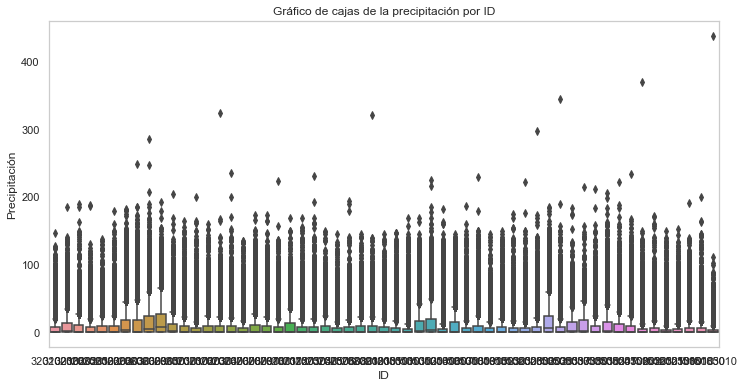

In [39]:
# Crear una figura y un conjunto de ejes en matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de cajas con seaborn
sns.boxplot(x='ID', y='prec', data=data, ax=ax)

# Personalizar las etiquetas y el aspecto del gráfico
ax.set_xlabel("ID")
ax.set_ylabel("Precipitación")
ax.set_title("Gráfico de cajas de la precipitación por ID")
ax.grid(axis='y')

# Mostrar el gráfico
plt.show()


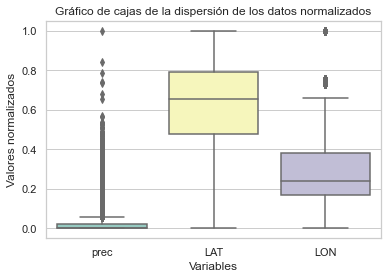

In [38]:
sns.boxplot(data=data_normalized[['prec', 'LAT', 'LON']], palette="Set3")
# Etiquetas personalizadas
plt.xlabel("Variables")
plt.ylabel("Valores normalizados")
plt.title("Gráfico de cajas de la dispersión de los datos normalizados")

# Mostrar el gráfico
plt.show()

### Evaluacion del modelo


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

Codigo para intentar evualar


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba usando solo la columna 'prec'
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['ID'])

# Realizar la imputación en todo el conjunto de datos de entrenamiento
imputed_train_data = impute_precipitation_parallel(train_data)

# Realizar la imputación en todo el conjunto de datos de prueba
imputed_test_data = impute_precipitation_parallel(test_data)

# Calcular el rendimiento de la imputación para cada estación en el conjunto de prueba
# Calcular el rendimiento de la imputación para cada estación en el conjunto de prueba
evaluation_results = {}
for station_id in test_data['ID'].unique():
    station_test_data = imputed_test_data[imputed_test_data['ID'] == station_id]
    
    # Filtrar solo las filas que contienen valores imputados en la columna 'prec'
    imputed_rows = station_test_data[station_test_data['prec'].isna()]
    
    if not imputed_rows.empty:
        # Combinar el conjunto de datos imputado con el conjunto de datos original de prueba para recuperar los valores reales
        real_and_imputed = imputed_rows[['ID', 'Date', 'prec_imputed']].merge(test_data[['ID', 'Date', 'prec']], on=['ID', 'Date'], how='left')

        # Eliminar filas con valores NaN en 'prec_imputed' o 'prec'
        real_and_imputed = real_and_imputed.dropna(subset=['prec_imputed', 'prec'])
        
        if not real_and_imputed.empty:
            # Comparar los valores imputados con los valores originales en el conjunto de prueba
            imputed_values = real_and_imputed['prec_imputed']
            real_values = real_and_imputed['prec']
            
            # Evaluar el rendimiento de la imputación
            rmse, r2, mae = evaluate_imputation_performance(real_values, imputed_values)
            
            evaluation_results[station_id] = {
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae
            }
        else:
            evaluation_results[station_id] = {
                'RMSE': None,
                'R2': None,
                'MAE': None
            }
    else:
        evaluation_results[station_id] = {
            'RMSE': None,
            'R2': None,
            'MAE': None
        }

# Imprimir los resultados de la evaluación
for station_id, performance in evaluation_results.items():
    print(f"Estación {station_id}:")
    if performance['RMSE'] is not None:
        print(f"  RMSE: {performance['RMSE']:.3f}")
        print(f"  R2: {performance['R2']:.3f}")
        print(f"  MAE: {performance['MAE']:.3f}")
    else:
        print("  No hay valores faltantes en los datos de prueba para esta estación.")
    print()


data.info()


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Aplicar KNNImputer en todo el conjunto de datos de entrenamiento
imputed_train_data = impute_precipitation_parallel(train_data)

# Aplicar KNNImputer en todo el conjunto de datos de prueba
imputed_test_data = impute_precipitation_parallel(test_data)

# Filtrar las filas del conjunto de prueba que originalmente tenían valores faltantes en 'prec'
test_data_with_missing = test_data[test_data['prec'].isna()]

# Obtener solo las filas correspondientes en el conjunto de datos imputados
imputed_test_data_with_missing_values = imputed_test_data[imputed_test_data.index.isin(test_data_with_missing.index)]

# Imprimir el conjunto de datos con valores imputados
print(imputed_test_data_with_missing_values)

# Comparar los valores imputados con los valores reales en 'prec' para calcular RMSE y MAE
y_true = test_data_with_missing['prec']
y_pred = imputed_test_data_with_missing_values.loc[y_true.index, 'prec_imputed']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


Intento de evaluacion

In [43]:
datosmetacomople = data.dropna()
datosmetacomople.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    592124 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      592124 non-null  int64  
 3   LAT     592124 non-null  float64
 4   LON     592124 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 27.1+ MB


In [53]:
datosmetacomople = data.dropna()
from joblib import Parallel, delayed
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def impute_precipitation_for_station(station_data, columns=['prec'], n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data[columns])
    station_data['prec_imputed'] = station_data_imputed[:, 0]
    return station_data

def impute_precipitation_parallel(data, n_jobs=5, columns=['prec']):
    stations = data['ID'].unique()
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station], columns=columns) for station in stations
    )
    imputed_data = pd.concat(results, ignore_index=True)
    return imputed_data

# Cargar y procesar los datos
datosmetacomople['Date'] = pd.to_datetime(datosmetacomople['Date'])

# Introducir valores faltantes aleatoriamente en la columna 'prec'
data_with_missing_values = generate_missing_data(datosmetacomople)

# Realizar la imputación en todo el conjunto de datos con valores faltantes
imputed_data = impute_precipitation_parallel(data_with_missing_values)

def evaluate_imputation_performance(real_values, imputed_values):
    rmse = np.sqrt(mean_squared_error(real_values, imputed_values))
    r2 = r2_score(real_values, imputed_values)
    mae = mean_absolute_error(real_values, imputed_values)
    return rmse, r2, mae

# Calcular el rendimiento de la imputación para cada estación
evaluation_results = {}
for station_id in datosmetacomople['ID'].unique():
    station_data = imputed_data[imputed_data['ID'] == station_id]

    # Filtrar solo las filas que contienen valores imputados en la columna 'prec'
    imputed_rows = station_data[station_data['prec'].isna()]

    if not imputed_rows.empty:
        # Combinar el conjunto de datos imputado con el conjunto de datos original para recuperar los valores reales
        real_and_imputed = imputed_rows[['ID', 'Date', 'prec_imputed']].merge(datosmetacomople[['ID', 'Date', 'prec']], on=['ID', 'Date'], how='left')

        # Eliminar filas con valores NaN en 'prec_imputed' o 'prec'
        real_and_imputed = real_and_imputed.dropna(subset=['prec_imputed', 'prec'])

        if not real_and_imputed.empty:
            # Comparar los valores imputados con los valores originales
            imputed_values = real_and_imputed['prec_imputed']
            real_values = real_and_imputed['prec']

            # Evaluar el rendimiento de la imputación
            rmse, r2, mae = evaluate_imputation_performance(real_values, imputed_values)
            evaluation_results[station_id] = {
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae
            }

C:\Users\ronal\AppData\Local\Temp\ipykernel_18436\2071428723.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosmetacomople['Date'] = pd.to_datetime(datosmetacomople['Date'])


In [59]:
# Imprimir los resultados de la evaluación
for station_id, performance in evaluation_results.items():
    print(f"ID de Estación {station_id}:")
    if performance['RMSE'] is not None:
        print(f"  RMSE: {performance['RMSE']:.3f}")
        print(f"  R2: {performance['R2']:.3f}")
        print(f"  MAE: {performance['MAE']:.3f}")
    else:
        print("  No hay valores faltantes en los datos para esta estación.")
    print()


ID de Estación 32010010:
  RMSE: 14.153
  R2: -0.000
  MAE: 9.153

ID de Estación 32020020:
  RMSE: 19.156
  R2: -0.001
  MAE: 12.829

ID de Estación 32030020:
  RMSE: 16.335
  R2: -0.000
  MAE: 11.067

ID de Estación 32035010:
  RMSE: 14.936
  R2: -0.000
  MAE: 9.532

ID de Estación 32035020:
  RMSE: 14.923
  R2: -0.001
  MAE: 9.732

ID de Estación 32060020:
  RMSE: 17.453
  R2: -0.000
  MAE: 11.447

ID de Estación 32060030:
  RMSE: 22.519
  R2: -0.000
  MAE: 15.669

ID de Estación 32060060:
  RMSE: 23.731
  R2: -0.002
  MAE: 16.492

ID de Estación 32060090:
  RMSE: 29.031
  R2: -0.004
  MAE: 20.283

ID de Estación 32060100:
  RMSE: 26.283
  R2: -0.000
  MAE: 18.547

ID de Estación 32065010:
  RMSE: 19.285
  R2: -0.000
  MAE: 12.653

ID de Estación 32070010:
  RMSE: 17.195
  R2: -0.000
  MAE: 10.559

ID de Estación 32070020:
  RMSE: 14.949
  R2: -0.000
  MAE: 9.635

ID de Estación 32070030:
  RMSE: 16.251
  R2: -0.000
  MAE: 11.227

ID de Estación 32070040:
  RMSE: 13.335
  R2: -0.007

In [69]:
import pandas as pd
ids = [32010010, 32020020, 32030020, 32035010, 32035020, 32060020, 32060030, 32060060, 32060090, 32060100, 32065010, 32070010, 32070020, 32070030, 32070040, 32070060, 32070080, 32070090, 32070100, 32070110, 32070120, 32075030, 32075040, 32075050, 32075060, 32075080, 32080010, 32090010, 32120010, 33035010, 35010010, 35010020, 35010040, 35010060, 35010070, 35010080, 35010090, 35010150, 35010230, 35015050, 35020060, 35025020, 35030020, 35030050, 35030370, 35030380, 35035010, 35035020, 35035070, 35045020, 35100020, 35105050, 35120010, 35125010, 35130010, 35180030, 35185010]

# Vector con los valores de RMSE
rmse = [14.153, 19.156, 16.335, 14.936, 14.923, 17.453, 22.519, 23.731, 29.031, 26.283, 19.285, 17.195, 14.949, 16.251, 13.335, 15.976, 14.516, 18.775, 14.860, 16.732, 17.569, 15.911, 14.804, 15.802, 13.189, 15.883, 16.292, 14.741, 14.810, 15.882, 17.115, 20.474, 23.985, 17.156, 20.805, 14.840, 18.824, 14.455, 15.459, 15.080, 16.055, 15.438, 25.852, 20.388, 20.430, 26.506, 20.573, 20.344, 17.260, 17.723, 16.046, 17.500, 15.202, 12.873, 15.972, 15.185, 11.813]
R2 = [-0.000, -0.001, -0.000, -0.000, -0.001, -0.000, -0.000, -0.002, -0.004, -0.000, -0.000, -0.000, -0.007, -0.001, -0.000, -0.003, -0.000, -0.000, -0.001, -0.000, -0.000, -0.000, -0.000, -0.000, -0.001, -0.000, -0.000, -0.001, -0.000, -0.002, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.001, -0.002, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.001, -0.000, -0.002, -0.000, -0.000, -0.000, -0.000, -0.006, -0.003, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.002, -0.000, -0.000, -0.000, -0.000, -0.006, -0.003]

MAE = [9.153, 12.829, 11.067, 9.532, 9.732, 11.447, 15.669, 16.492, 20.283, 18.547, 12.653, 10.559, 9.635, 11.227, 9.438, 10.451, 9.653, 12.646, 9.770, 10.534, 12.474, 10.089, 9.689, 10.596, 8.847, 9.987, 10.606, 10.234, 10.141, 9.814, 10.123, 14.677, 16.516, 10.423, 14.371, 9.341, 11.682, 9.409, 10.210, 9.349, 9.993, 10.190, 18.341, 11.545, 13.808, 18.098, 12.096, 14.368, 12.235, 11.579, 9.822, 10.177, 8.952, 8.479, 10.338, 9.872, 7.618]


data2 = {'ids': ids, 'rmse': rmse, 'R2': R2, 'MAE': MAE}
df = pd.DataFrame(data2)

ValueError: All arrays must be of the same length

In [66]:
evaluation_results_df = pd.DataFrame(columns=['ID de estación', 'RMSE', 'R2', 'MAE'])


evaluation_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID de estación  0 non-null      object
 1   RMSE            0 non-null      object
 2   R2              0 non-null      object
 3   MAE             0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [65]:
for station_id, performance in evaluation_results.items():
if performance['RMSE'] is not None:
evaluation_results_df = evaluation_results_df.append({
'Station ID': station_id,
'RMSE': performance['RMSE'],
'R2': performance['R2'],
'MAE': performance['MAE']
}, ignore_index=True)

IndentationError: expected an indented block after 'for' statement on line 1 (2594399700.py, line 2)

## Bibliografia 

Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data (Vol. 333). John Wiley & Sons.

### Correlacion espacial

In [3]:
pip install pysal

     -------------------------------------- 331.8/331.8 KB 1.4 MB/s eta 0:00:00
     -------------------------------------- 275.7/275.7 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 50.1/50.1 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 41.8/41.8 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 141.3/141.3 KB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.4/58.4 KB ? eta 0:00:00
     -----------------------------------

You should consider upgrading via the 'c:\Users\ronal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pysal as ps
import geopandas as gpd

# Cargar datos espaciales (por ejemplo, un archivo shapefile)
gdf = gpd.read_file('path_to_shapefile.shp')
# Matriz de pesos espaciales
w = ps.lib.weights.Queen.from_dataframe(gdf)
# Variable a analizar
y = gdf['column_name'].values
# Calculo de Moran's I
mi = ps.explore.esda.Moran(y, w)
print(mi.I, mi.p_sim)


ModuleNotFoundError: No module named 'pysal'

In [ ]:
from pysal.explore.esda import Moran_Local

# Calculo de LISA
lisa = Moran_Local(y, w)
# Visualización
import matplotlib.pyplot as plt
gdf['lisa_cluster'] = lisa.Is
gdf.plot(column='lisa_cluster')
plt.show()


Referencias 

@article{rubin1976,
  title={Inference and missing data},
  author={Rubin, Donald B},
  journal={Biometrika},
  volume={63},
  number={3},
  pages={581--592},
  year={1976},
  publisher={Oxford University Press}
}

@book{little1987,
  title={Statistical Analysis with Missing Data},
  author={Little, Roderick JA and Rubin, Donald B},
  year={1987},
  publisher={John Wiley \& Sons}
}

@book{hastie2009,
  title={The Elements of Statistical Learning: Data Mining, Inference, and Prediction},
  author={Hastie, Trevor and Tibshirani, Robert and Friedman, Jerome},
  year={2009},
  publisher={Springer Science \& Business Media}
}

@book{james2013,
  title={An Introduction to Statistical Learning},
  author={James, Gareth and Witten, Daniela and Hastie, Trevor and Tibshirani, Robert},
  year={2013},
  publisher={Springer}
}

@book{bishop2006,
  title={Pattern Recognition and Machine Learning},
  author={Bishop, Christopher M},
  year={2006},
  publisher={springer}
}
